## REFERENCE 
https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic


## **Part1: Exploratory Data Analysis(EDA)**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #역시나 시각화 도구
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore') #시사 데이터 분석 사이트 filterwarnings의 스타일로 시각화
%matplotlib inline

In [55]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 파일 경로 설정 (하위 폴더 없음!)
train_path = "train.csv"
test_path = "test.csv"
gender_path = "gender_submission.csv"

# Pandas 형식으로 데이터 불러오기
train_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "eugeniekim/titanic",  # 대소문자 주의: 소문자!
    train_path
)

test_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "eugeniekim/titanic",
    test_path
)

gender_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "eugeniekim/titanic",
    gender_path
)



In [11]:

data = pd.read_csv("../input/titanic/train.csv")


In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.isnull().sum()  #checking for total null values
#The Age, Cabin and Embarked have null values. I will try to fix them.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

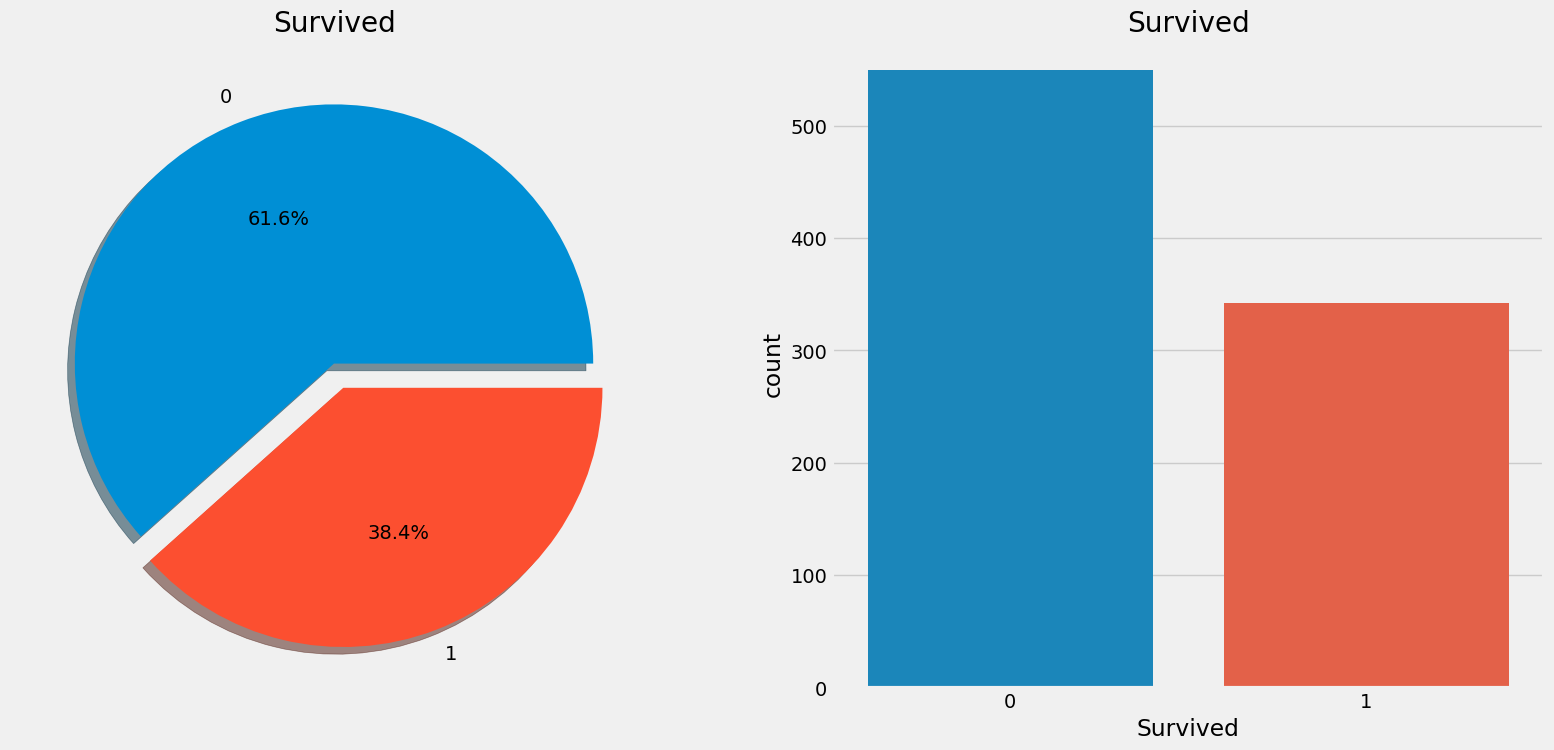

In [14]:
# 1행 2열의 subplot을 생성 (크기는 18x8 인치)
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 subplot: 생존 여부를 파이차트로 표시
data['Survived'].value_counts().plot.pie(  # 생존 여부(Survived) 값의 개수를 파이 차트로 그림
    explode=[0, 0.1],                      # 두 번째 조각(생존자)을 약간 튀어나오게 설정
    autopct='%1.1f%%',                     # 퍼센트 표시 포맷
    ax=ax[0],                              # 첫 번째 subplot에 그리기
    shadow=True                            # 그림자 효과 추가
)
ax[0].set_title('Survived')                # 첫 번째 subplot의 제목 설정
ax[0].set_ylabel('')                       # y축 레이블은 제거 (파이 차트엔 불필요)

# 두 번째 subplot: 생존 여부를 countplot으로 표시 (막대 그래프)
sns.countplot(x='Survived', data=data, ax=ax[1])  # 생존 여부를 기준으로 카운트 막대 그래프 그림
ax[1].set_title('Survived')                       # 두 번째 subplot의 제목 설정

# 그래프 전체 출력
plt.show()


## **Analysing The Feactures**

In [15]:
data.groupby(['Sex', 'Survived'])['Survived'].count()
# 데이터를 'Sex'(성별)과 'Survived'(생존 여부) 기준으로 그룹화
# 각 그룹에서 'Survived' 컬럼의 값을 세어서 (즉, 각 그룹의 행 개수)
# 성별별로 생존/사망 인원이 각각 몇 명인지 카운트


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

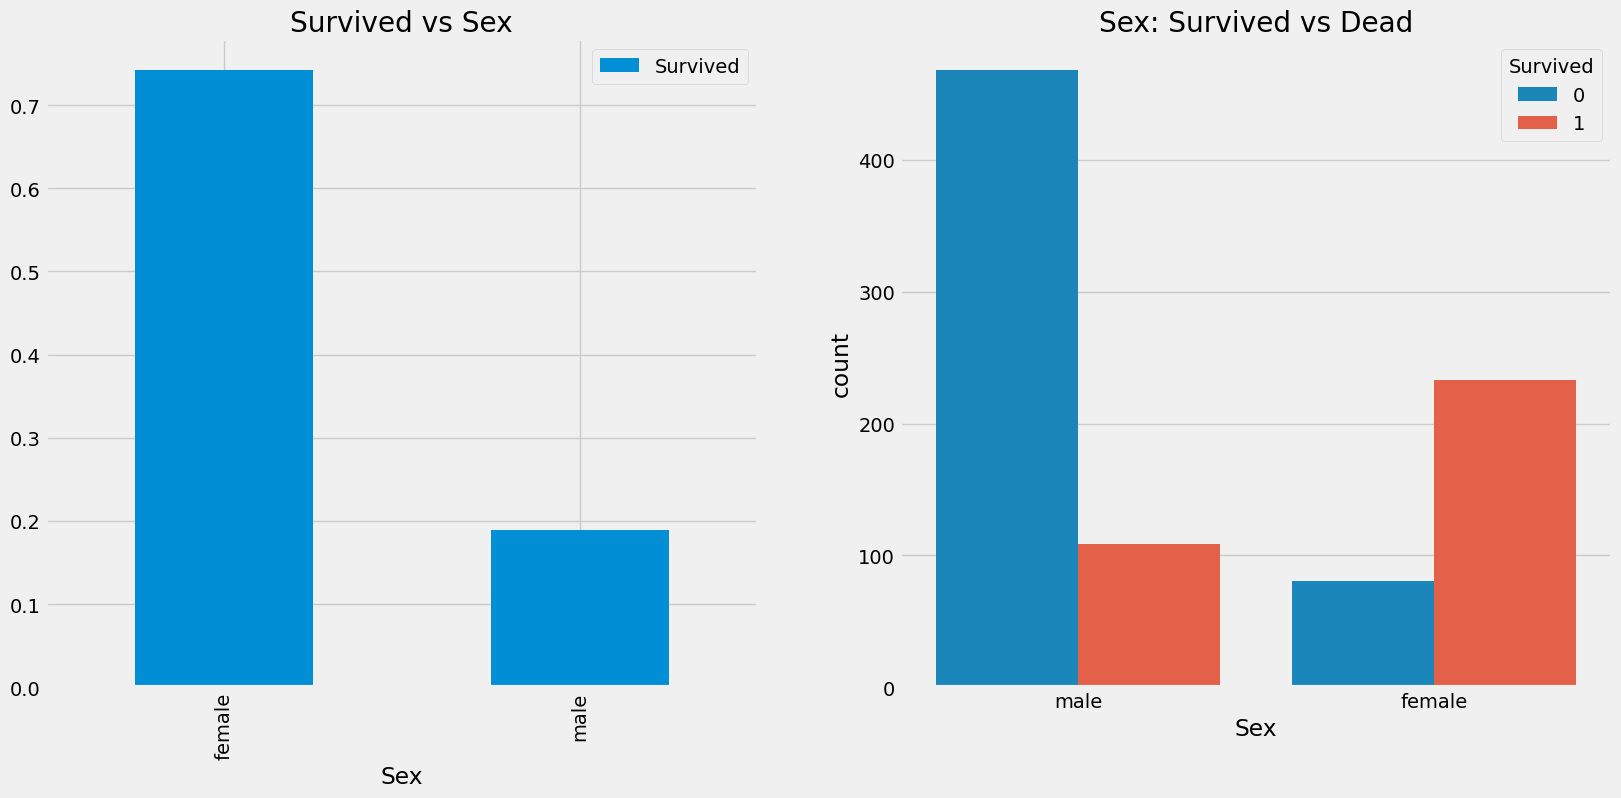

In [16]:
# 1행 2열 subplot 생성, 크기는 18x8 인치
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 왼쪽 그래프: 성별에 따른 생존률의 평균을 막대 그래프로 표시
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# 'Sex'를 기준으로 그룹화한 후, 'Survived' 컬럼의 평균(= 생존률)을 계산하여 막대 그래프로 그림
ax[0].set_title('Survived vs Sex')  # 왼쪽 subplot의 제목 설정

# ax[0]: 왼쪽 그래프 영역
# ax[1]: 오른쪽 그래프 영역

# 오른쪽 그래프: 성별에 따른 생존/사망자 수를 카운트플롯으로 표시
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
# x축은 성별, 색(hue)은 생존 여부로 나누어 막대그래프를 그림
ax[1].set_title('Sex: Survived vs Dead')  # 오른쪽 subplot의 제목 설정

# 전체 그래프 출력
plt.show()


In [17]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

# pd.crosstab(): 교차표(cross-tabulation table)를 만듭니다.
# data.Pclass: 행(index) → 객실 등급 (1등석, 2등석, 3등석)
# data.Survived: 열(columns) → 생존 여부 (0: 사망, 1: 생존)
# margins=True: 행/열의 **합계(All)**를 추가해줍니다
# cmap='summer_r': "여름" 컬러맵을 **reverse(반전)**해서 사용함

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


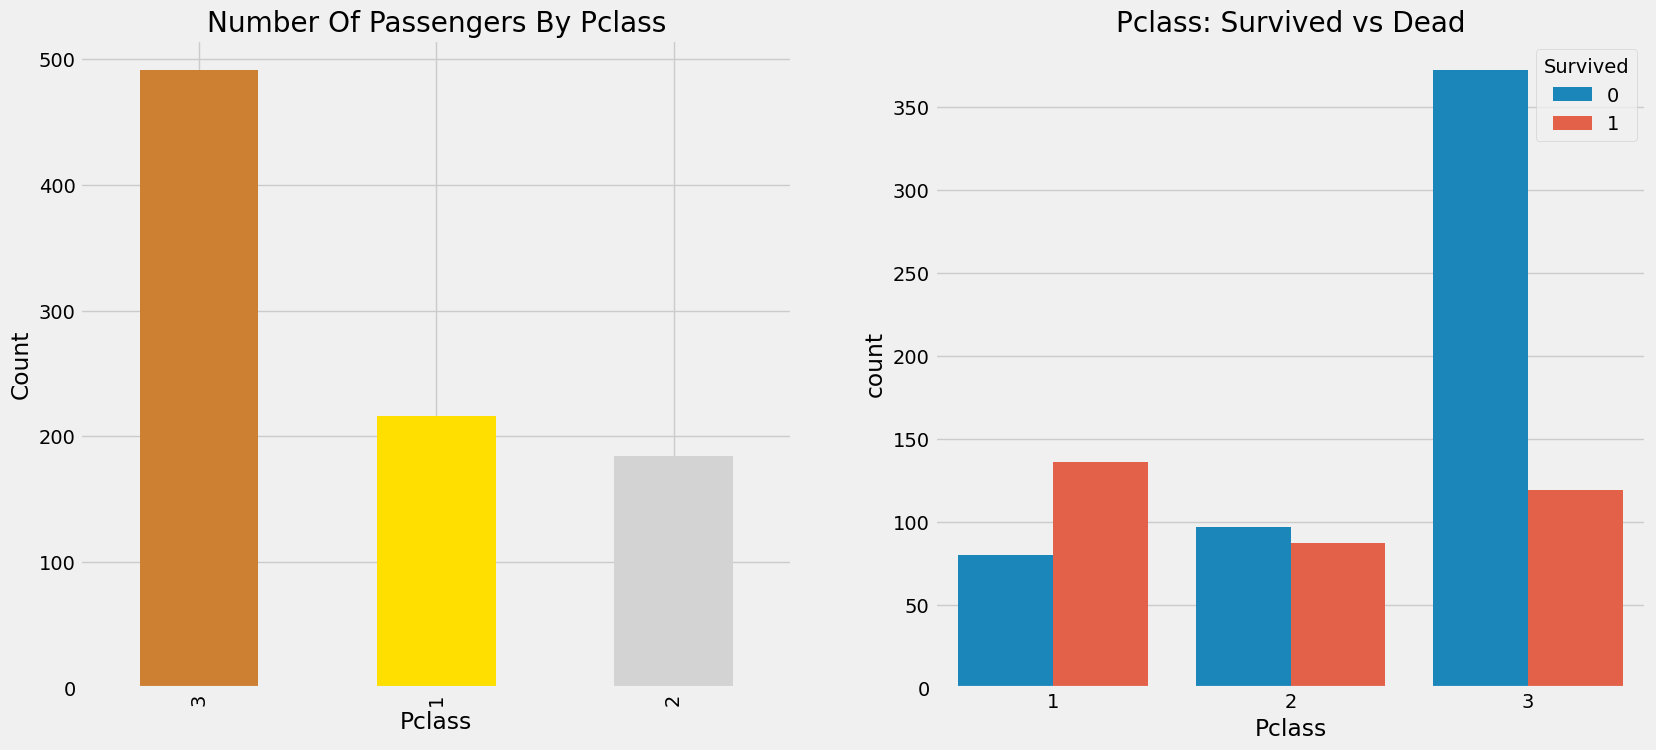

In [18]:
# 1행 2열 subplot 생성, 크기는 18x8 인치
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 왼쪽 그래프: Pclass별 승객 수 막대 그래프
data['Pclass'].value_counts().plot.bar(  # 등급 순서대로 정렬
    color=['#CD7F32', '#FFDF00', '#D3D3D3'],           # 색상: 동, 금, 은 느낌으로 설정
    ax=ax[0]                                           # 왼쪽 subplot에 그림
)
ax[0].set_title('Number Of Passengers By Pclass')      # 제목 설정 (오타 수정: 'Pcalss' → 'Pclass')
ax[0].set_ylabel('Count')                              # y축 레이블

# 오른쪽 그래프: Pclass별 생존/사망자 수 비교 (countplot)
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
# x축은 Pclass, 생존 여부는 hue로 구분한 막대 그래프
ax[1].set_title('Pclass: Survived vs Dead')            # 제목 설정

# 전체 그래프 출력
plt.show()

In [19]:
pd.crosstab([data.Sex,data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

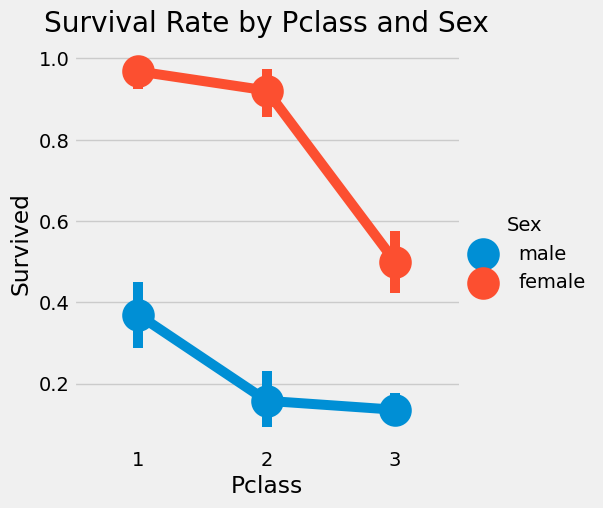

In [20]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
#sex 로 색상 구분을 해준다는 말
plt.title('Survival Rate by Pclass and Sex')  # catplot에는 기본적으로 fig-level 함수라 set_title이 따로 필요
plt.show()
#kind의 경우 graph의 종류를 의미
# kind 값	설명
# 'strip'	흩어진 점 (raw 데이터 하나하나 보여줌)
# 'swarm'	겹치지 않게 점 배치 (strip의 개선판)
# 'box'	박스플롯 (중앙값, 사분위수, 이상치 등 표시)
# 'violin'	커널 밀도 기반 분포 모양 시각화
# 'bar'	막대그래프 (평균값 + 오차 막대)
# 'point'	선으로 이어진 점 (평균값을 연결해서 변화 보여줌)
# 'count'	y축 없이 개수만 막대그래프로 보여줌 (x에 범주형 데이터만 있을 때 유용)

## Age -> Continous Feature

In [21]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


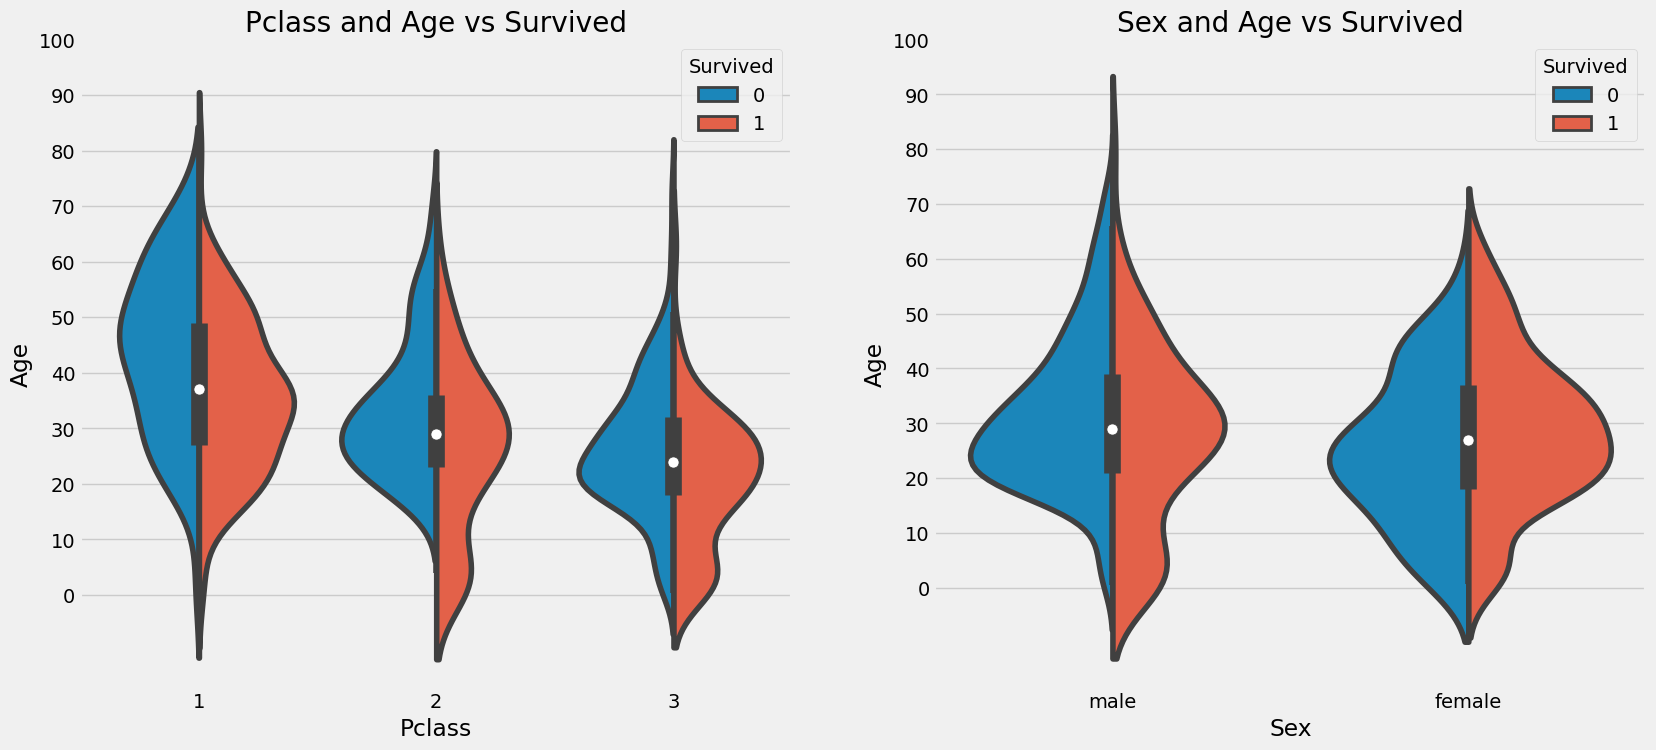

In [22]:
# 1행 2열 subplot 생성 (크기는 18x8 인치) — 여기서 괄호 잘못 들어갔어요!
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 왼쪽 그래프: 객실 등급(Pclass)에 따른 나이 분포, 생존 여부(hue)로 나누어 시각화
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')        # 제목 설정
ax[0].set_yticks(range(0, 110, 10))                   # y축 눈금 0~100까지 10 간격으로 설정

# 오른쪽 그래프: 성별(Sex)에 따른 나이 분포, 생존 여부(hue)로 나누어 시각화
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')            # 제목 오타 수정 ('Agw' → 'Age')
ax[1].set_yticks(range(0, 110, 10))                   # y축 눈금 설정

# 그래프 출력
plt.show()


In [23]:
# 이름에서 Mr, Mrs, Miss 등 호칭(Initial) 추출
data['Initial'] = data['Name'].str.extract(r'([A-Za-z]+)\.')


In [24]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

#pd.crosstab(data.Initial, data.Sex)        # 1. 교차표 생성
#.T                                         # 2. 행과 열을 전치 (transpose)
#.style.background_gradient(cmap='summer_r')# 3. 색상 그라데이션 적용


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], 
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], 
                        inplace=True)

In [26]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [27]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46


In [28]:
data.Age.isnull().any()

False

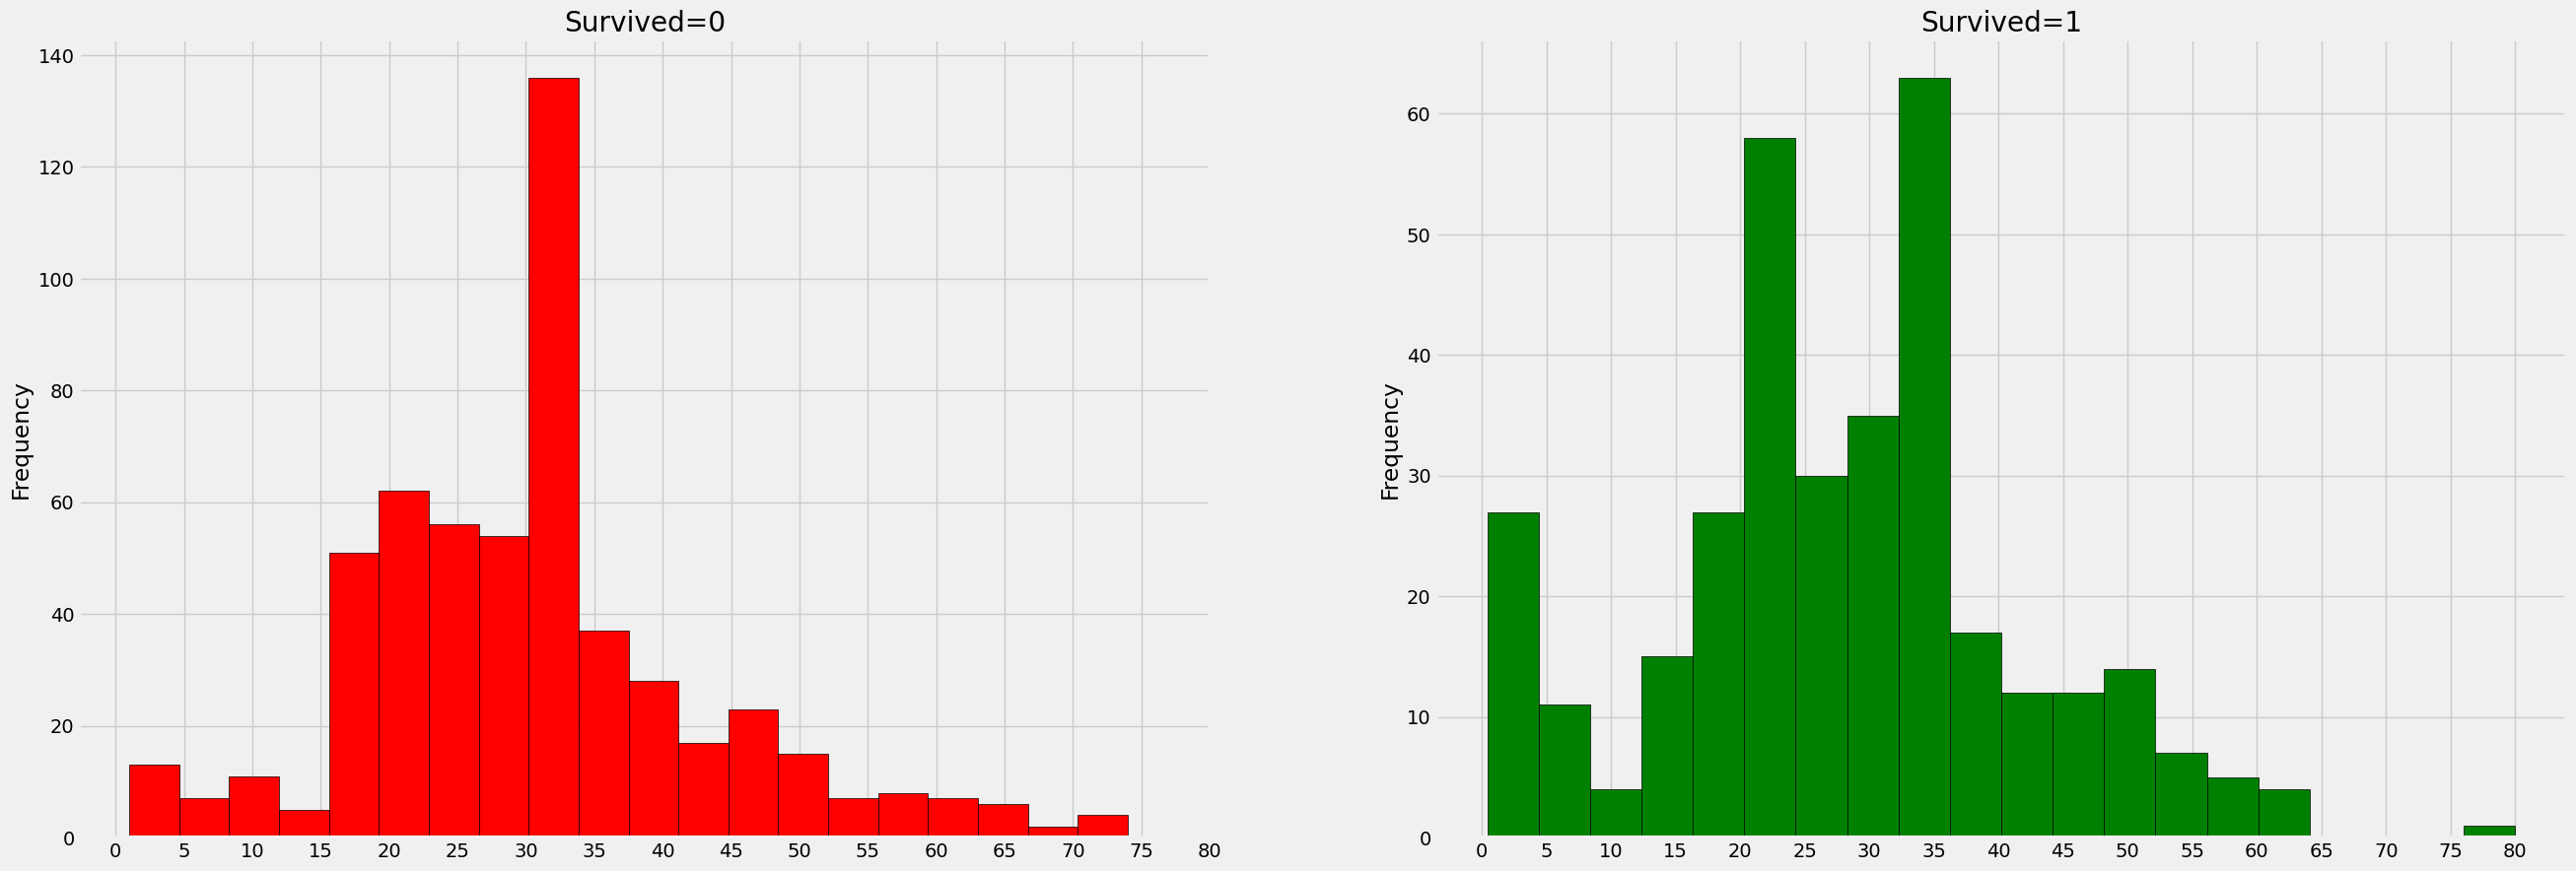

In [29]:
f, ax=plt.subplots(1,2,figsize=(29,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# 1행 2열 subplot 생성, 크기는 29x10 인치 (넓게!)
# f, ax = plt.subplots(1, 2, figsize=(29, 10))

# # 왼쪽 그래프: 생존하지 못한 사람들(Survived == 0)의 나이 분포
# data[data['Survived'] == 0].Age.plot.hist(  # 생존하지 못한 승객의 나이로 히스토그램
#     ax=ax[0],            # 왼쪽 subplot에 그리기
#     bins=20,             # 구간을 20개로 나눔
#     edgecolor='black',   # 막대 테두리 색
#     color='red'          # 막대 내부 색
# )
# ax[0].set_title('Survived = 0')             # 왼쪽 그래프 제목
# x1 = list(range(0, 85, 5))                  # x축 눈금: 0부터 80까지 5 간격
# ax[0].set_xticks(x1)

# # 오른쪽 그래프: 생존한 사람들(Survived == 1)의 나이 분포
# data[data['Survived'] == 1].Age.plot.hist(  # 생존한 승객의 나이로 히스토그램
#     ax=ax[1],            # 오른쪽 subplot에 그리기
#     color='green',       # 초록색으로 표시
#     bins=20,             # 동일하게 구간 20개
#     edgecolor='black'    # 테두리
# )
# ax[1].set_title('Survived = 1')             # 오른쪽 그래프 제목
# x2 = list(range(0, 85, 5))                  # 동일한 x축 눈금
# ax[1].set_xticks(x2)

# # 두 그래프 나란히 출력
# plt.show()


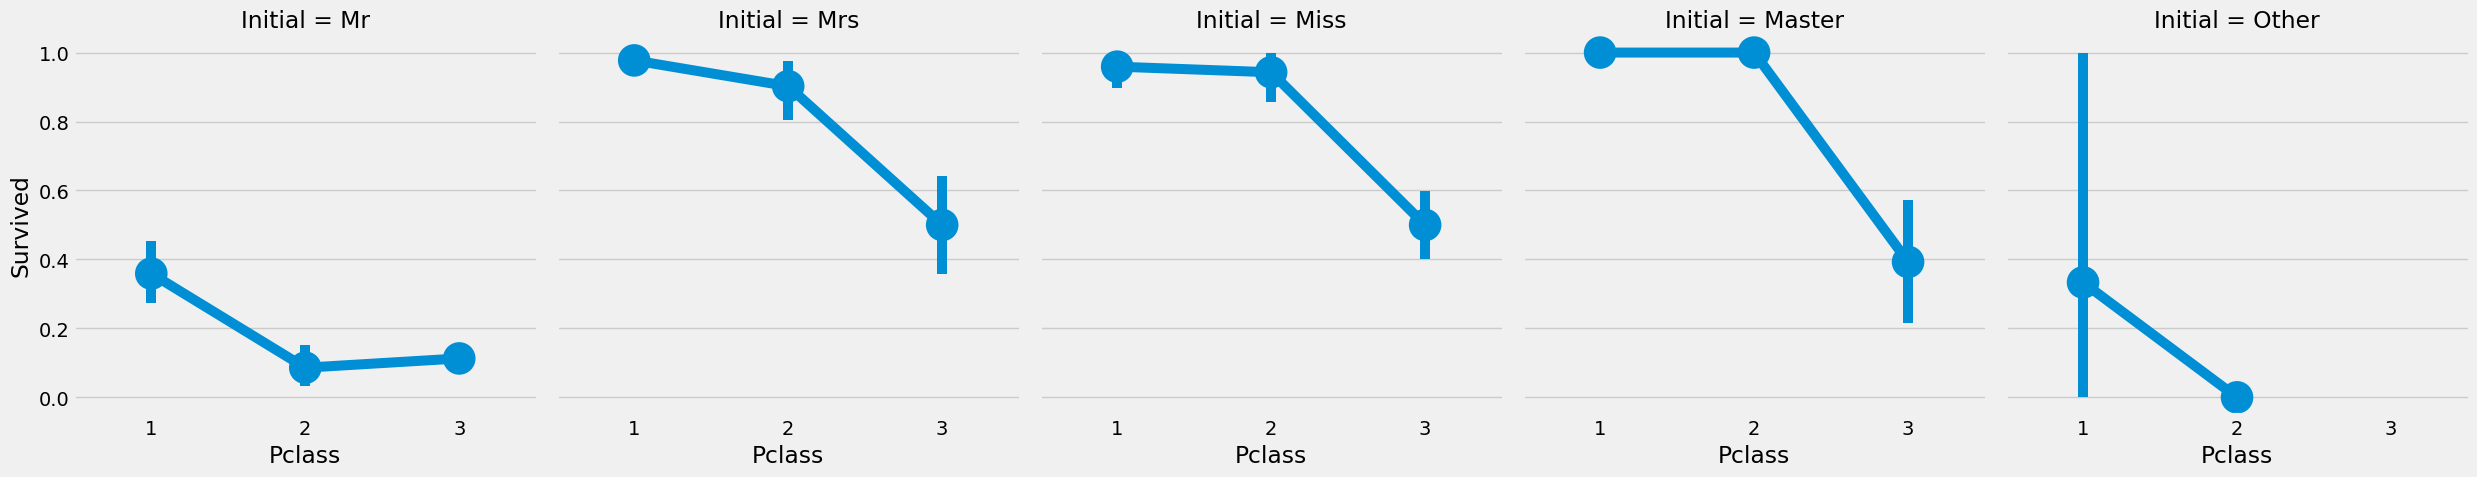

In [30]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

## Embarked -> Categorical Value

In [31]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

## **Chances for Survival by Port of Embarkation**

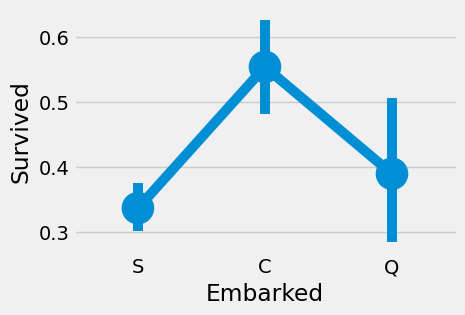

In [32]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()



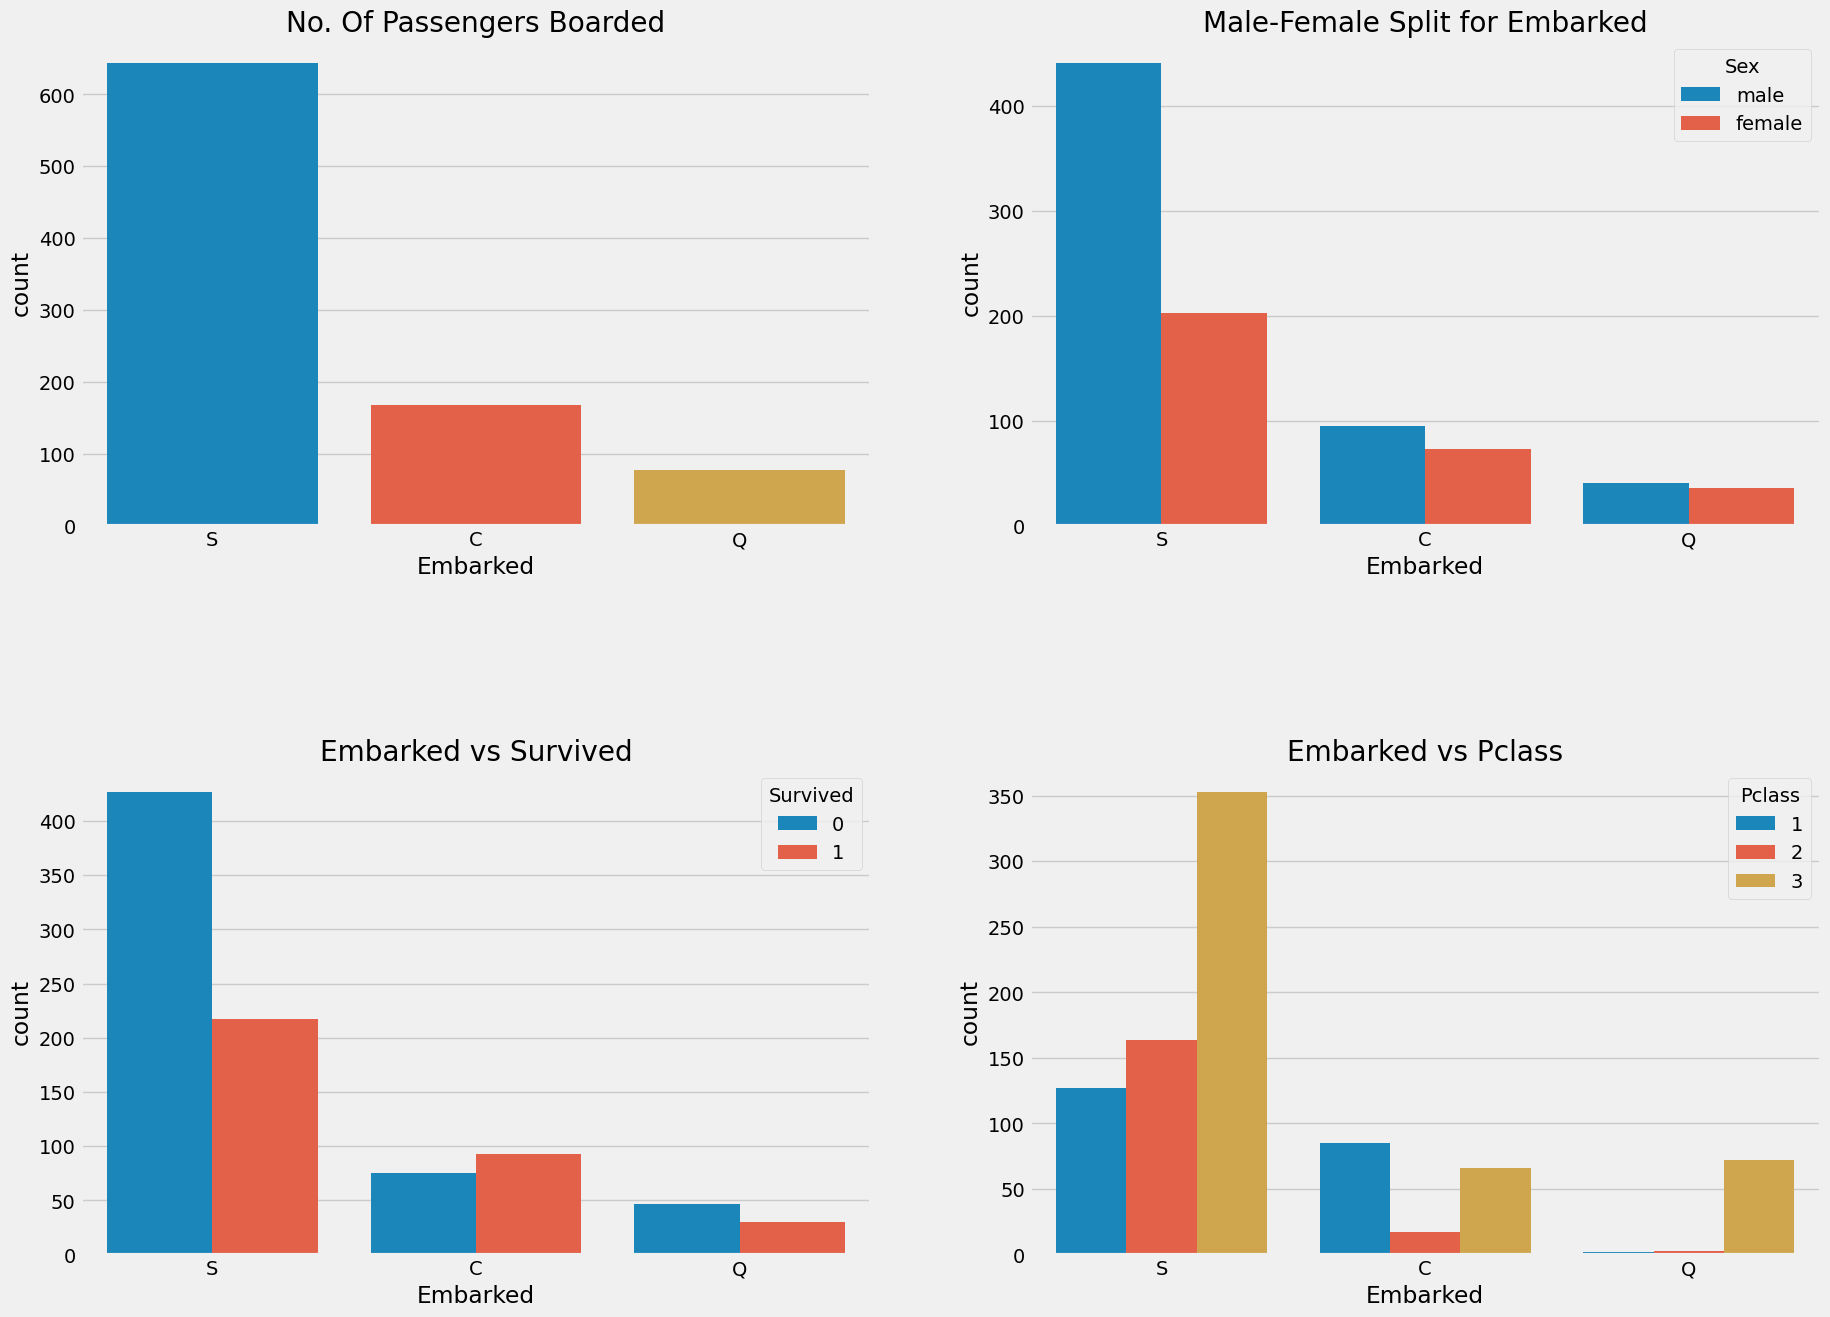

In [33]:
# 2행 2열 subplot 생성, 전체 크기 설정
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# [0, 0] 탑승 항구별 전체 승객 수
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

# [0, 1] 탑승 항구별 성별 분포
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

# [1, 0] 탑승 항구별 생존 여부 분포
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# [1, 1] 탑승 항구별 객실 등급 분포
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# 서브플롯 간 간격 조정
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# 전체 출력
plt.show()


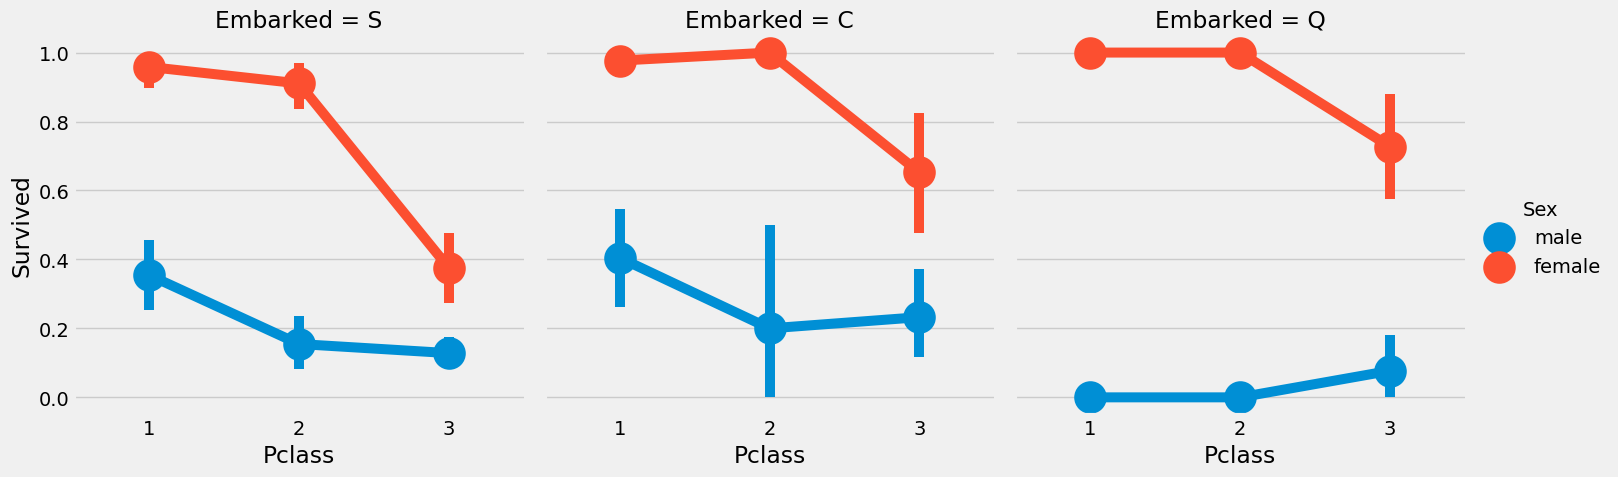

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()


In [35]:
data['Embarked'].fillna('S', inplace=True)  # 'Embarked' 컬럼의 결측치(NaN)를 'S'로 채움 (S는 Southampton)
                                            # inplace=True → 원본 data에 바로 적용 (새 변수 안 만듦)


In [36]:
data.Embarked.isnull().any()

False

## SibSip -> Discrete Feature

In [37]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')
#SibSp = Siblings + Spouse

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


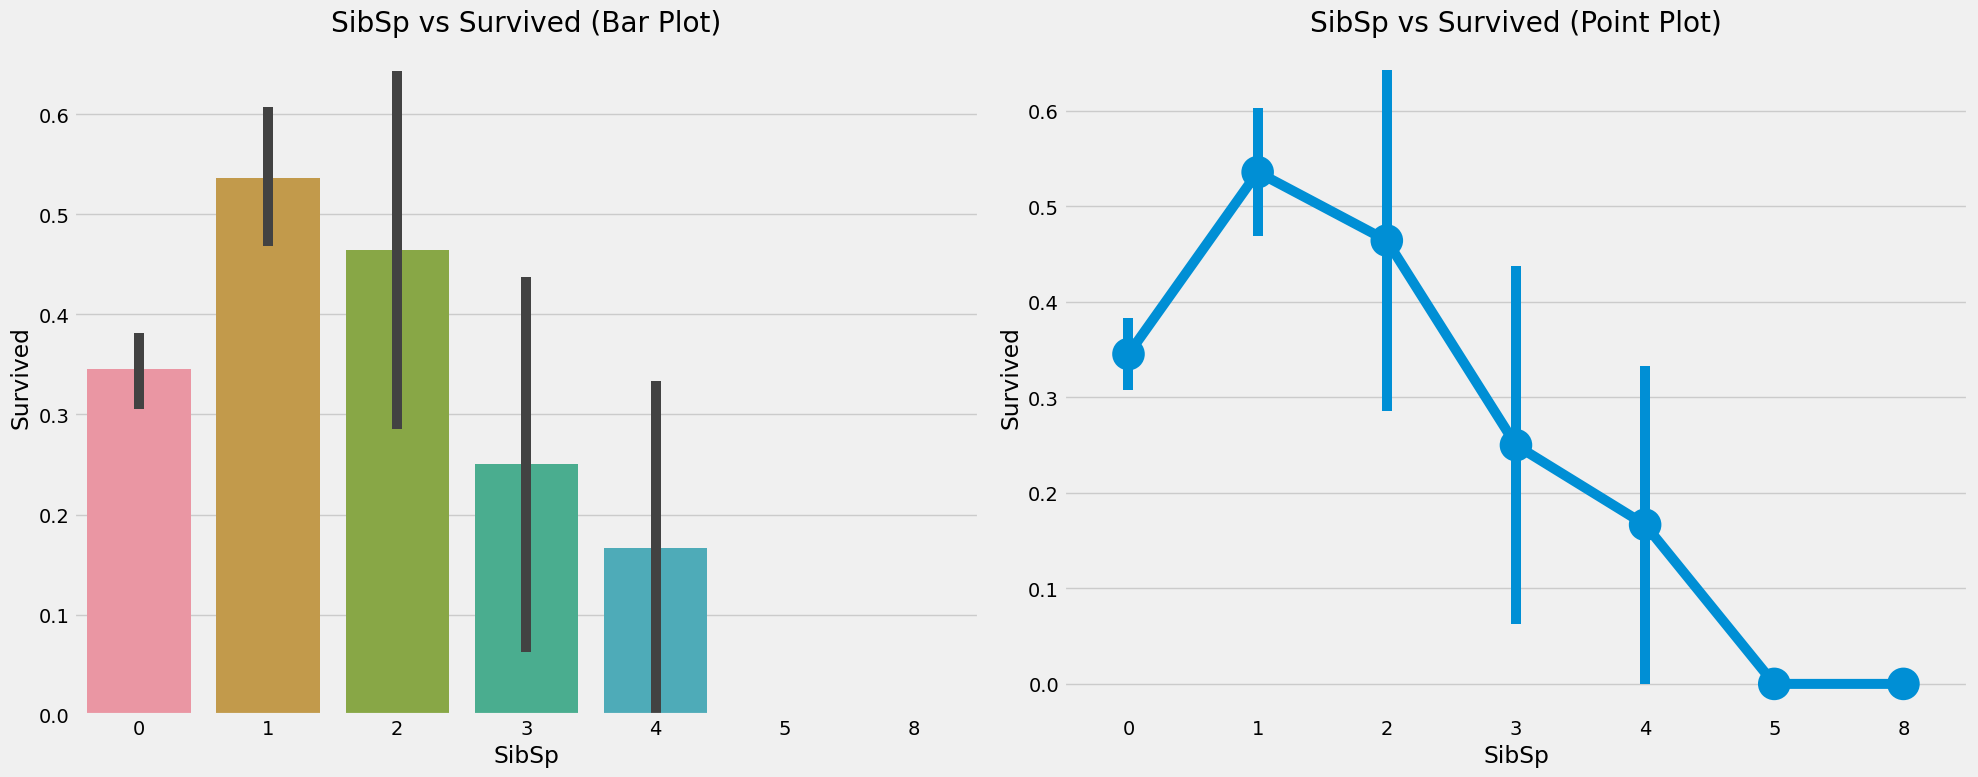

In [38]:
# 1행 2열 subplot 생성, 크기 설정
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# 왼쪽 그래프: barplot으로 SibSp별 생존률 시각화
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived (Bar Plot)')

# 오른쪽 그래프: pointplot으로 같은 내용 시각화 (ax[1]에 직접 그림 - catplot으로는 불가함)
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived (Point Plot)')

plt.tight_layout()
plt.show()


In [39]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [40]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


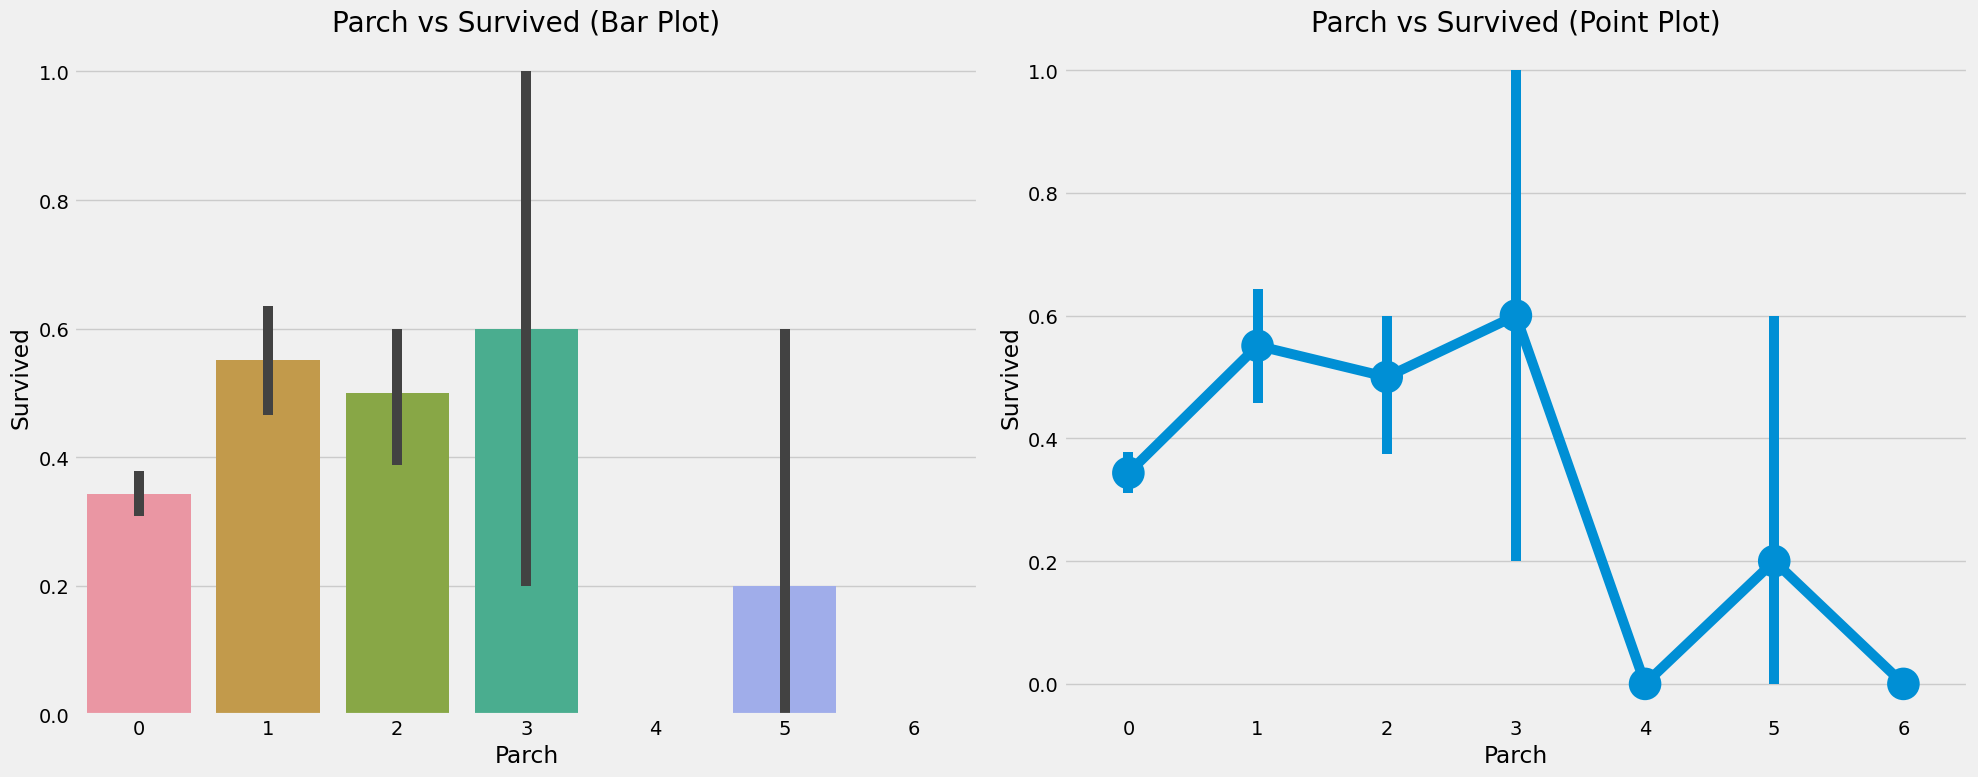

In [41]:
# 1행 2열 subplot 생성
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# 왼쪽: Parch별 생존률 barplot
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived (Bar Plot)')

# 오른쪽: pointplot으로 생존률 변화 선 그래프
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived (Point Plot)')

plt.tight_layout()
plt.show()


## Fare -> Continous Feature

In [42]:
print('Hightest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())


Hightest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


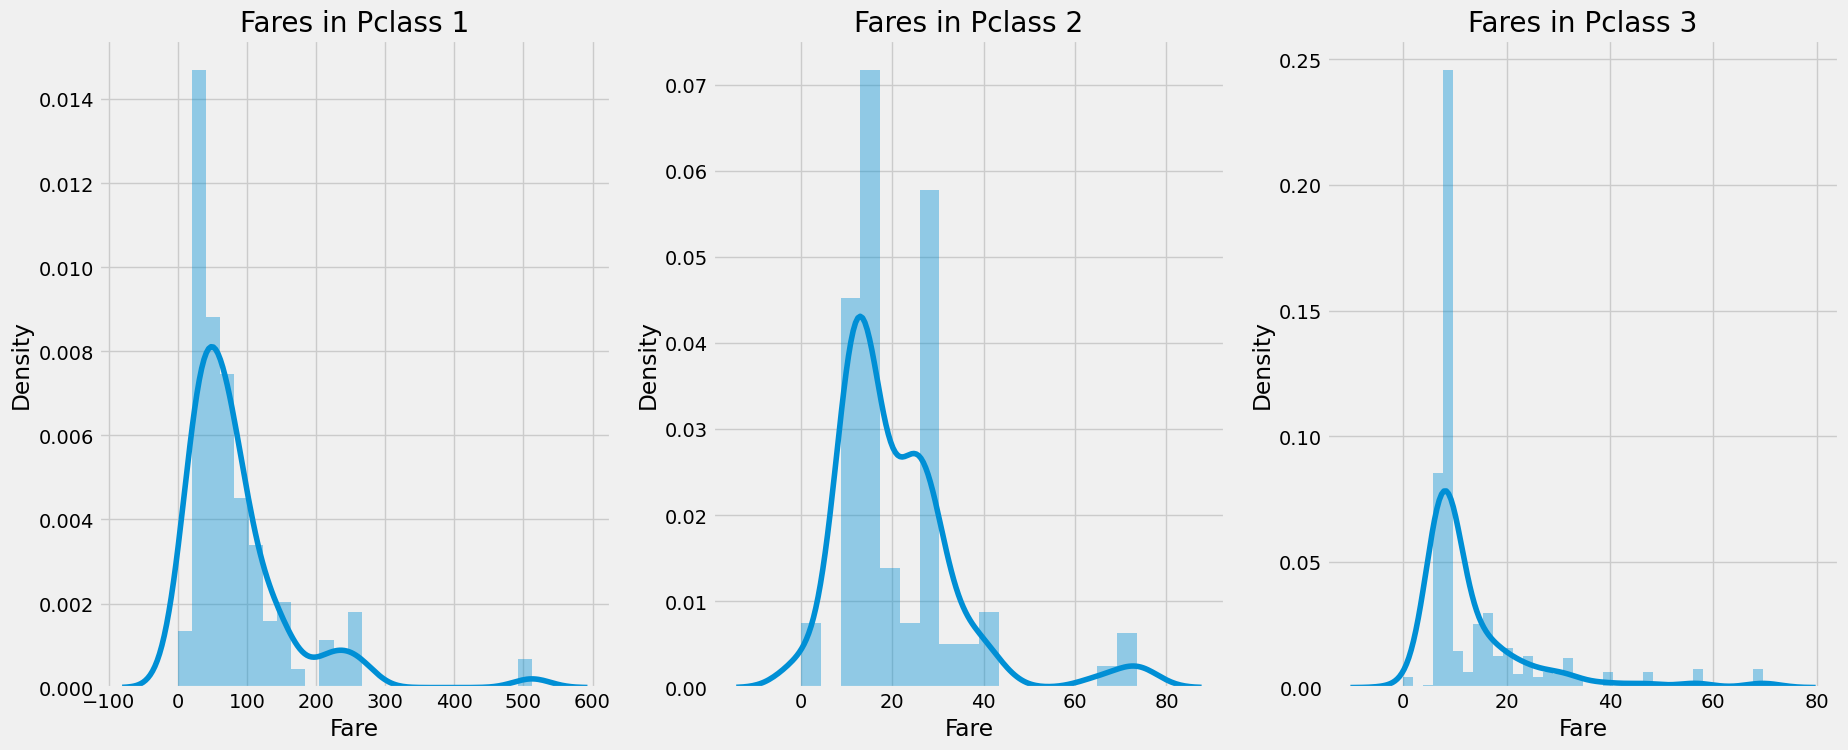

In [50]:
# 1행 3열의 서브플롯(fig와 ax 배열)을 생성하고, 전체 크기를 가로 20인치 x 세로 8인치로 설정
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Pclass가 1등급인 승객들의 요금(Fare) 분포를 첫 번째 서브플롯(ax[0])에 시각화
# seaborn의 distplot은 히스토그램 + KDE 커널 밀도 추정을 함께 그려줌
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')  # 그래프 제목 설정

# Pclass가 2등급인 승객들의 요금 분포를 두 번째 서브플롯(ax[1])에 시각화
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')  # 그래프 제목 설정

# Pclass가 3등급인 승객들의 요금 분포를 세 번째 서브플롯(ax[2])에 시각화
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')  # 그래프 제목 설정

# 모든 그래프를 출력
plt.show()


## **Correlations between the Feactures**

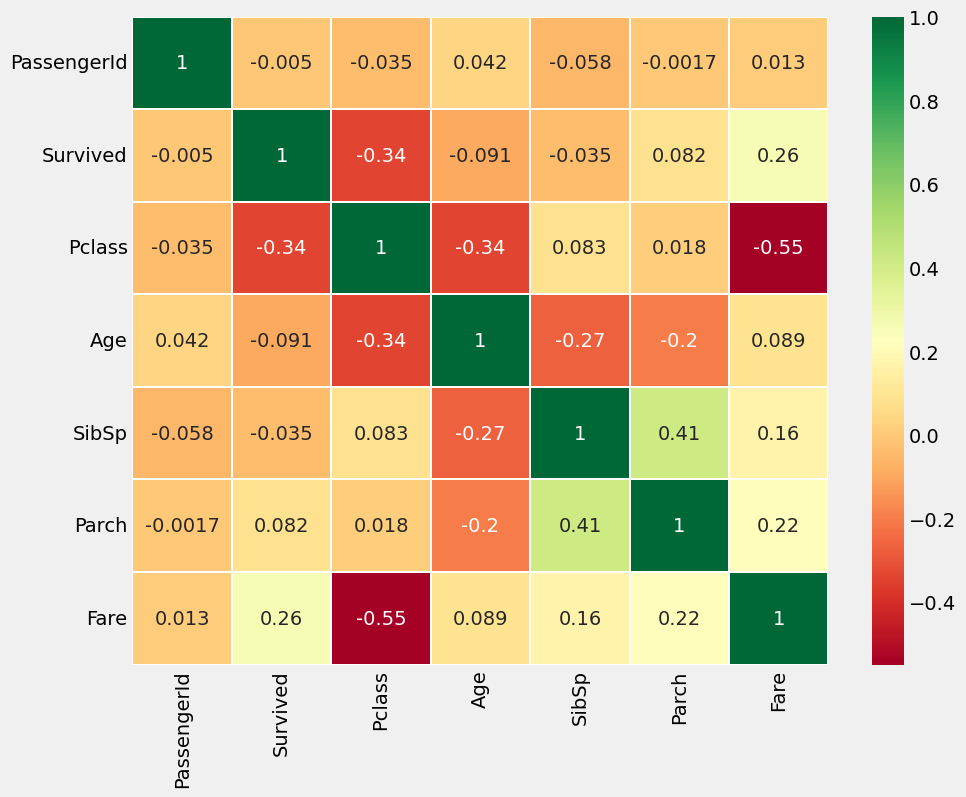

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 데이터만 골라서 상관행렬 계산
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 상관행렬 시각화
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

# 크기 설정
fig = plt.gcf()
fig.set_size_inches(10, 8)

# 그래프 출력
plt.show()


## **Part2: Feature Engineering and Data Cleaning¶**

In [60]:
# 새로운 열 'Age_band'를 생성하고 초기값을 모두 0으로 설정
data['Age_band'] = 0

# 나이가 16세 이하인 경우 'Age_band' 값을 0으로 설정 (어린이)
data.loc[data['Age'] <= 16, 'Age_band'] = 0

# 나이가 17세에서 32세 이하인 경우 'Age_band' 값을 1로 설정 (청년)
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1

# 나이가 33세에서 48세 이하인 경우 'Age_band' 값을 2로 설정 (중년 초반)
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2

# 나이가 49세에서 64세 이하인 경우 'Age_band' 값을 3으로 설정 (중년 후반)
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3

# 나이가 64세 초과인 경우 'Age_band' 값을 4로 설정 (노년)
data.loc[data['Age'] > 64, 'Age_band'] = 4

# 결과 확인 (상위 2개 행 출력)
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [62]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


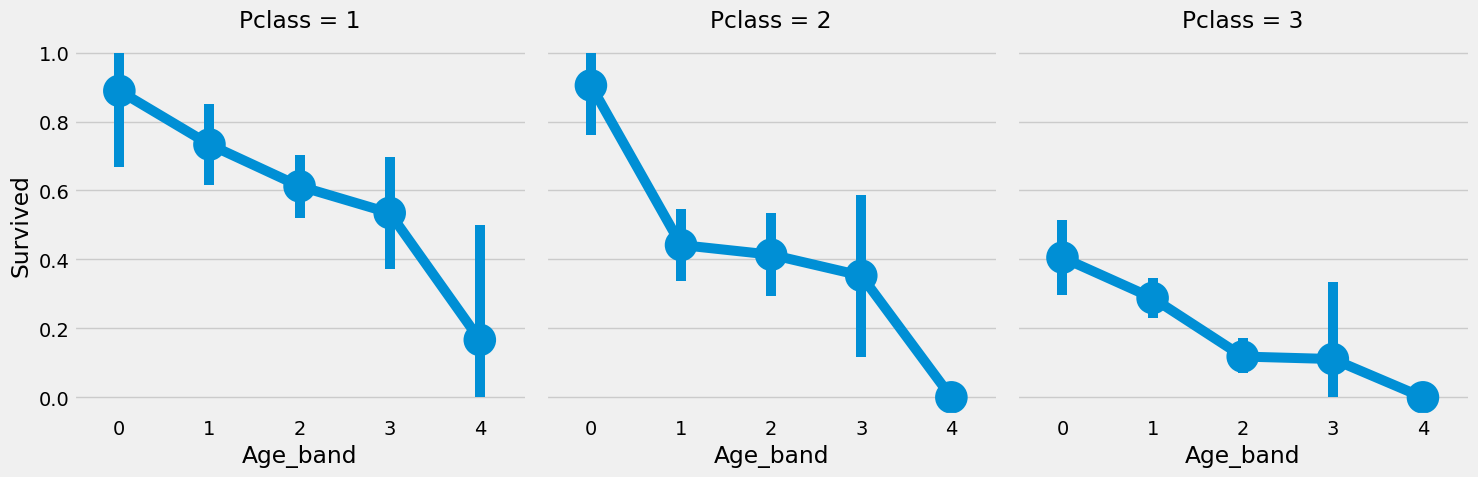

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Age_band'별 생존률을 'Pclass'별로 나눠서 시각화
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')

plt.show()

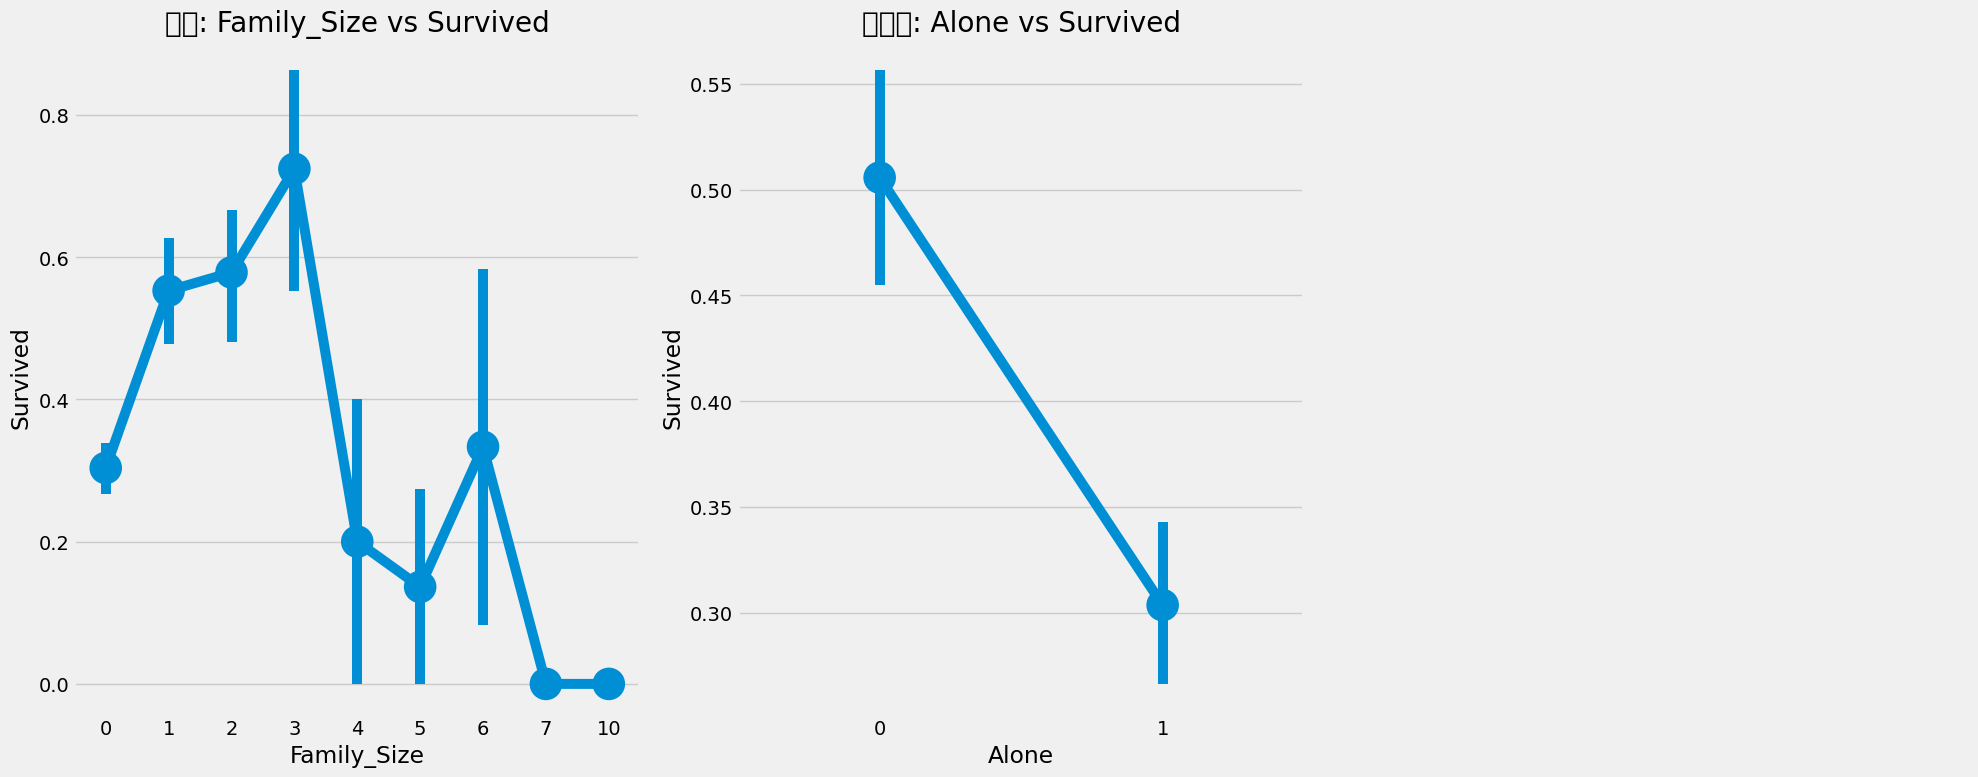

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Family_Size 계산
data['Family_Size'] = data['Parch'] + data['SibSp']

# 혼자인 경우 Alone = 1
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

# 서브플롯 생성: 1행 3열 (하나는 비워둘 수도 있음)
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# 첫 번째 subplot (예: Family_Size vs Survived)
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('왼쪽: Family_Size vs Survived')

# 두 번째 subplot (예: Alone vs Survived)
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('가운데: Alone vs Survived')

# 세 번째 subplot은 비워둡니다 (필요하면 추가로 작성)
ax[2].axis('off')  # 빈 subplot 숨김

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


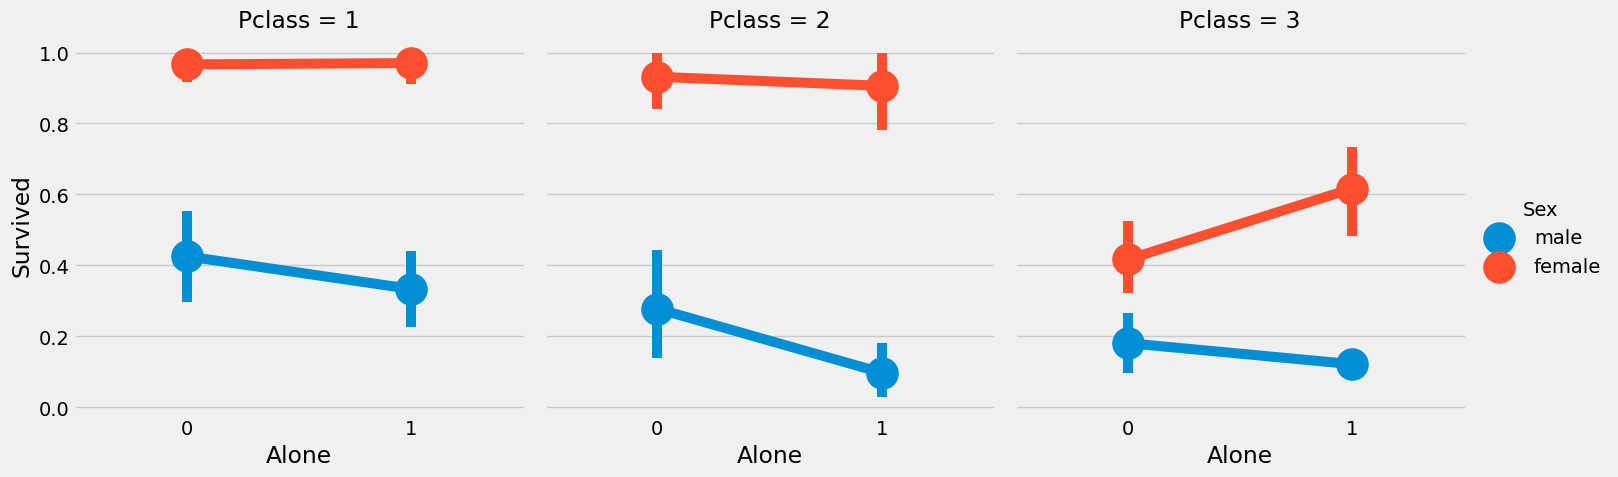

In [75]:
sns.catplot(
    x='Alone',
    y='Survived',
    hue='Sex',
    col='Pclass',
    kind='point',
    data=data
)

plt.show()

In [77]:
# 승객 요금(Fare)을 4개의 분위수(사분위수, quartiles)로 나눠 새로운 범주형 변수 Fare_Range 생성
# pd.qcut은 데이터를 동일한 개수로 나누기 때문에, 승객을 4등분하여 각 그룹에 속하게 됩니다.
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

# 각 요금 범위(Fare_Range) 그룹별 평균 생존률(Survived)의 평균을 계산하고,
# 보기 좋게 스타일링하여 시각적 패턴을 쉽게 확인할 수 있도록 설정
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()\
    .style.background_gradient(cmap='summer_r')  # 생존률이 높을수록 더 진한 초록색으로 표시


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [79]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=531),'Fare_cat']=3


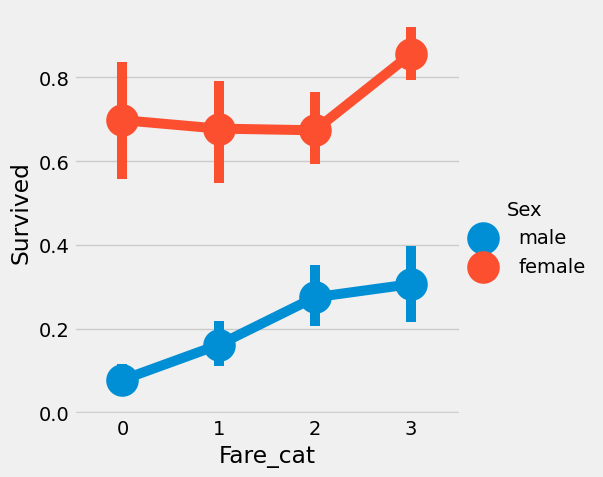

In [83]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

## **Converting String Values into Numeric¶**

Dropping UnNeeded Features
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

In [84]:
data['Sex'].replace(['male', 'female'], [0,1],inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

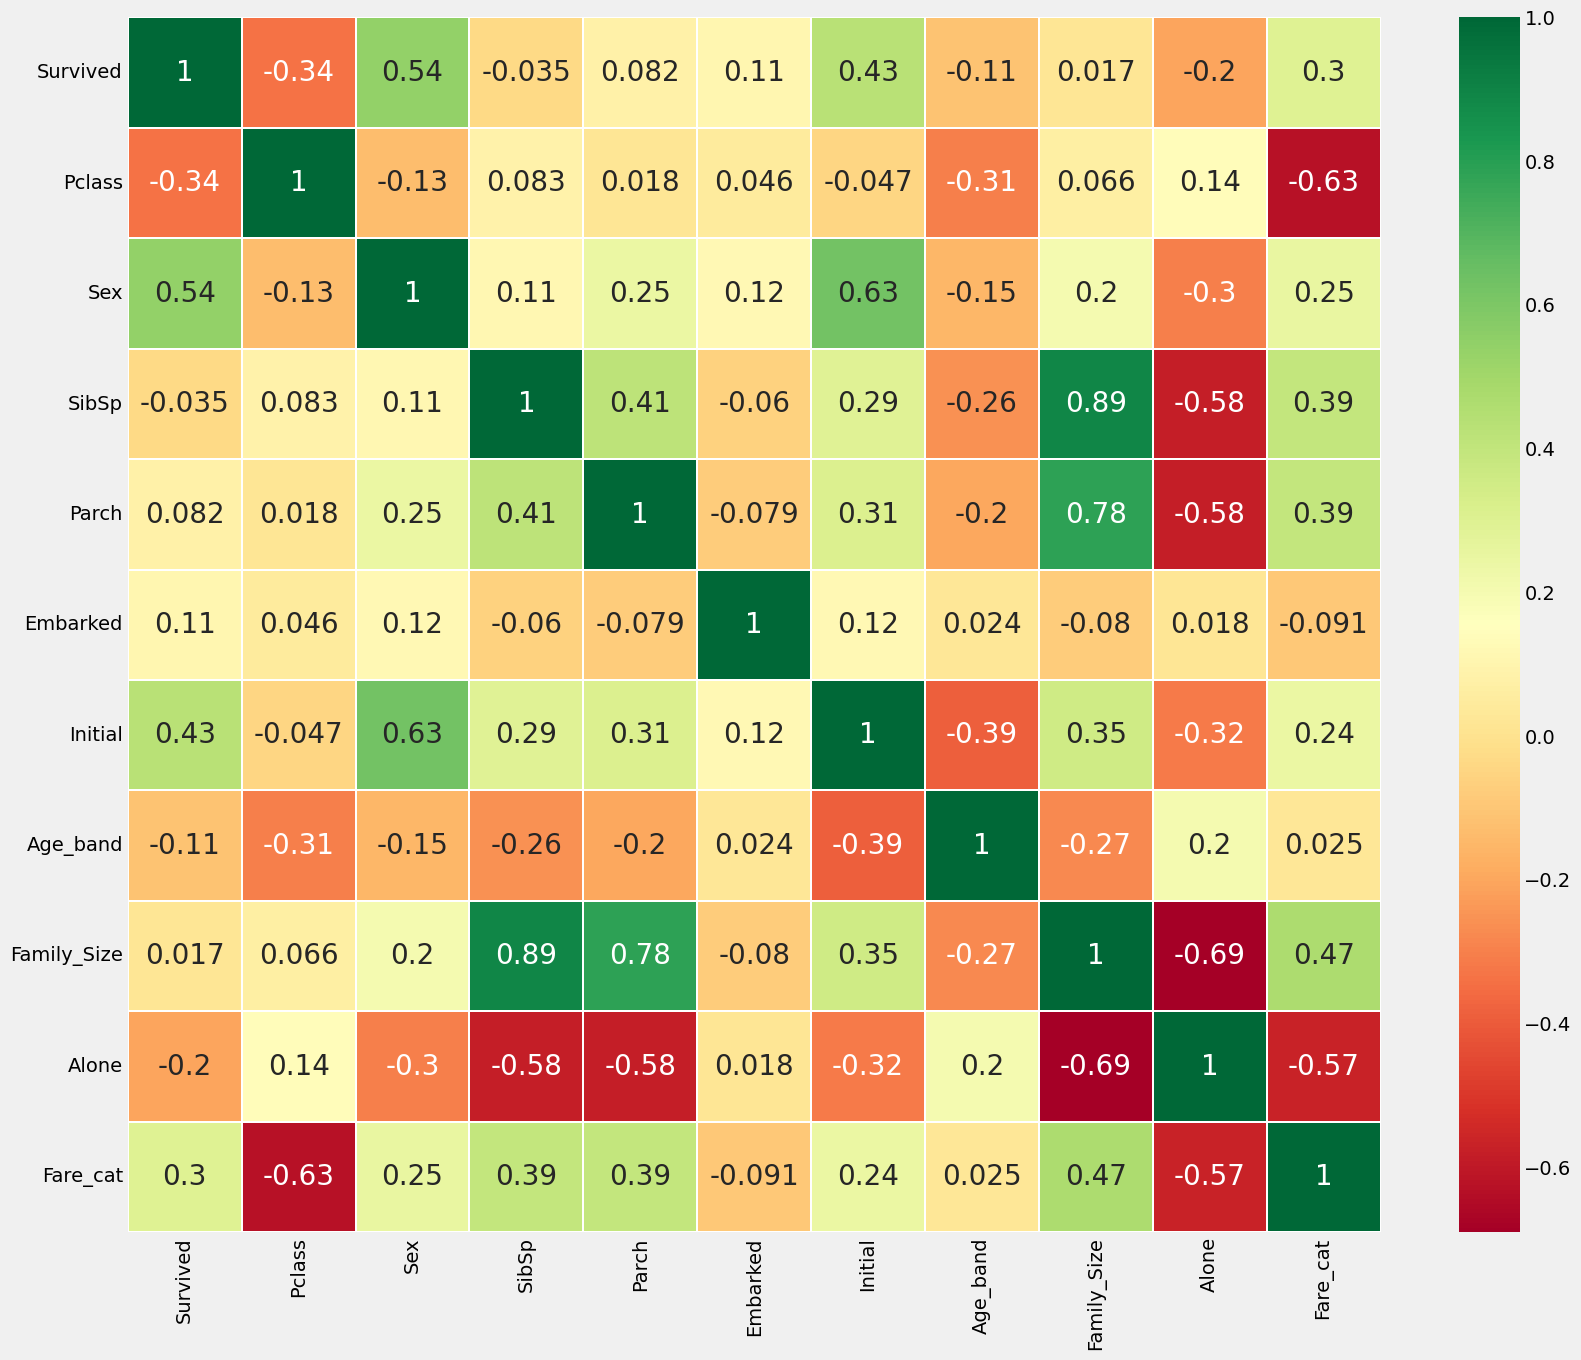

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# 불필요한 열 삭제 (없는 열이 있어도 에러 없이 진행)
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
          axis=1, inplace=True, errors='ignore')

# 상관관계 행렬을 시각화
sns.heatmap(
    data.corr(),                      # 수치형 변수 간의 상관계수 계산
    annot=True,                      # 셀 안에 수치값 표시
    cmap='RdYlGn',                   # 색상 맵: 빨강-노랑-초록
    linewidths=0.2,                  # 셀 경계선 두께
    annot_kws={'size': 20}           # 숫자 글자 크기
)

# 그림 크기 조절
fig = plt.gcf()
fig.set_size_inches(18, 15)

# 눈금(label) 글자 크기 조정
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 그래프 출력
plt.show()


## Part3: Predictive Modeling¶

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [95]:
#importing all the required ML packages
#각 ML 모델은 survival이 어느 정도 일지만 분석해 줄 슈 있고, 나머지는 알아서 세부 분석을 진행 하여야 함 (결국 가장 정확도가 높은 방식을 찾아가는 과정 
# 높은 생존률을 예측했다고 하더라도, 분석 결과에 따라 결국 분석가가 채택할 모델을 선택 하여야 함)
#왜냐하면 특히 타이타닉 모델에서는, 그냥 모두 죽었다고 하도라도 예측율은 80%이상



# 🔧 그래서 분석가는 무엇을 해야 하느냐?
# confusion_matrix, precision, recall, f1-score 확인
# 데이터를 나눠서 검증 (train_test_split, cross-validation)
# 변수별 영향력 확인 (coef_, feature importance)
# 오차 분석 → 어떤 케이스에서 잘 틀리는지


from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [118]:
# 데이터를 학습용(train)과 테스트용(test)으로 7:3 비율로 나눔 (모델의 성능을 공정하고 객관적으로 유지하기 위함)
# 모델이 훈련 데이터만 보고 학습하면, 그 데이터에 너무 과적합(overfitting) 될 수 있어요.

# 그래서 학습에 사용하지 않은 **새로운 데이터(test)**로 평가해야,
# 실제 상황에서도 잘 작동하는지 판단할 수 있어요. +generalisation을 확인해야 새로운 데이터가 들어와도 관찮음 


# ✅ 정리
# 용어	설명
# train	모델을 학습시키는 데 사용되는 데이터
# test	학습에 사용하지 않고, 성능 평가에만 사용하는 데이터
# stratify	분류 문제에서 클래스 비율을 균형 있게 나누기 위한 옵션
# test_size	테스트셋 비율 지정 (예: 0.3 → 30%)


# stratify 옵션으로 'Survived' 비율이 train과 test에 동일하게 유지되도록 함
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# 학습용 데이터에서 피처(X)만 추출 (첫 번째 열인 'Survived'는 제외)
train_X = train[train.columns[1:]]

# 학습용 데이터에서 정답 레이블(Y)만 추출 ('Survived' 열)
train_Y = train[train.columns[:1]]

# 테스트용 데이터에서 피처(X)만 추출
test_X = test[test.columns[1:]]

# 테스트용 데이터에서 정답 레이블(Y)만 추출
test_Y = test[test.columns[:1]]

# 전체 데이터에서 입력 피처(X)만 추출 (예: 교차 검증 또는 전체 재학습 시 사용)
X = data[data.columns[1:]]

# 전체 데이터에서 정답 레이블(Y) 추출
Y = data['Survived']


Radial Support Vector Machines(rbf-SVM)¶

In [114]:
# 이 코드는 SVM(Support Vector Machine) 분류 모델을 사용해
# Titanic 데이터에서 승객 생존 여부(Survived)를 예측하고,
# 그 예측의 정확도(Accuracy) 를 계산하는 작업입니다.

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


SVM 모델을 통해 분석히였고, 0.835820895522388 정확함. (테스트 데이터셋의 승객 268명 중에서 약 **83.6% (224명 정도)**의 생존 여부를 정확하게 예측하였음)
(그러나 세부 분석을 위해서는 Confusion matrix (정답/오답이 어떻게 구성되어 있는지)

Precision / Recall / F1-score (특히 생존자 예측을 잘했는가?)) 등의 모델 분석이 수반되는 것이 더 정확함.

In [116]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)

# =0.1, gamma=0.1 같은 건 바로 **SVM 모델의 하이퍼파라미터(hyperparameters)**예요.
# 즉, 머신러닝 모델이 학습을 어떻게 할지 조절하는 설정값입니다.
# 모델이 예측을 “정확하게 하려고 얼마나 노력할지”를 조정하는 손잡이 같은 거죠.

model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


🔍 두 모델 결과 요약:
모델	커널 종류	정확도 (Accuracy)	설명
model 1	RBF (kernel='rbf')	0.8358 (83.6%)	복잡한 비선형 경계 가능
model 2	Linear (kernel='linear', C=0.1)	0.8172 (81.7%)	단순한 직선 경계

📊 비교 분석:
✅ 1. 정확도 관점
RBF 커널이 약 2% 더 높은 정확도를 기록했어요.

이는 Titanic 데이터가 선형적인 방식으로 구분되지 않는 복잡한 패턴을 갖고 있을 가능성을 시사합니다.

예: 생존 여부가 단순히 성별이나 등급만으로는 완전히 분리되지 않음

✅ 2. 커널의 역할
커널	설명	이 실험에서의 해석
RBF	데이터 간의 거리를 기반으로 복잡한 곡선 경계 생성 가능	더 높은 정확도 → Titanic 데이터의 복잡한 특성에 잘 맞음
Linear	선형 결정 경계(직선/평면)를 사용	성능은 준수하지만 약간 떨어짐 → 변수들이 완전히 선형 분리되지 않음

✅ 3. 하이퍼파라미터 C의 영향
C=1 (RBF): 오차를 어느 정도 허용하면서 복잡한 모델을 허용

C=0.1 (Linear): 규제가 강해서 단순한 모델이 학습됨 → 과소적합 가능성

→ RBF 모델은 조금 더 유연하며, 현재 문제에 더 적합해 보여요.

🧠 결론:
Titanic 데이터는 완전히 선형적으로 구분되지 않기 때문에, RBF 커널이 더 적합

하지만 Linear SVM도 꽤 좋은 성능을 보여주므로, 해석 가능성이 중요할 경우 선택지로 고려할 수 있어요.

예: 의료, 법률 등에서는 단순하고 해석 가능한 모델이 유리할 수 있음

✅ 다음에 해보면 좋은 실험:
C 값을 높이거나 낮춰서 과적합/과소적합을 실험해보기

gamma 값을 조절해서 RBF의 경계 복잡도 조절

Confusion Matrix, Precision, Recall, F1-score로 더 정밀한 비교

필요하면 그 중 하나 실험도 도와드릴게요. 어떤 걸 해보고 싶으세요?










In [120]:
model = LogisticRegression()
model.fit(train_X,train_Y) #로지스틱 회귀 모델을 훈련시킴
prediction3=model.predict(test_X) #훈련시킨 모델로 생존 여부를 예측
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y)) #예측 결과와 실제 값 비교 → **정확도(accuracy)**를 계산해서 출력

The accuracy of the Logistic Regression is 0.8134328358208955


In [122]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


You said:
근데 왜 머신 러닝은 그러면 몇 프로가 진짜인지를 알려주지는 않고 정확도만 말하는건데? 아니면 내가 아직 안 ㄴ물어봤나..? 케글 처음 따라가는 거랄 아직 모름


ChatGPT said:
정확하게 보셨어요. ✅
지금 하신 말 —

“왜 머신러닝은 몇 %가 진짜(생존)고, 예측이 얼마나 맞았는지는 안 알려주고 그냥 정확도만 말하는 거야?”
이건 **당신이 아직 ‘그걸 물어보지 않았기 때문’**이에요.
모델은 당신이 시키는 것만 해요.

💡 머신러닝은 “도구”일 뿐입니다.
모델은 예측만 합니다.
분석은 사람이 합니다.

예를 들어:

python
Copy
Edit
model.predict(test_X)
이건 그냥 결과를 내놓는 거예요.
이제 그 예측이 얼마나 "진짜 생존자와 맞는가?"를 분석하려면 우리가 따로 물어봐야 합니다.

✅ 그래서 당신이 더 “물어볼 수 있는 것들”
내가 물어볼 수 있는 질문	어떻게 물어보는가
실제 생존자는 몇 %였나?	test_Y.value_counts(normalize=True)
모델은 몇 명을 생존자라고 예측했나?	prediction.value_counts(normalize=True)
모델이 생존자 중 몇 명을 맞췄나?	confusion_matrix(test_Y, prediction)
생존자를 얼마나 잘 맞췄나?	recall_score(test_Y, prediction)
죽은 사람을 얼마나 잘 걸러냈나?	precision_score(test_Y, prediction)

📊 예시 코드 (지금 바로 써볼 수 있어요)
python
Copy
Edit
from sklearn.metrics import classification_report, confusion_matrix

1. 생존자 비율
print("실제 생존율:")
print(test_Y.value_counts(normalize=True))

2. 모델 예측 생존자 비율
print("모델의 예측 생존율:")
print(pd.Series(prediction).value_counts(normalize=True))

3. 정답/오답 매트릭스
print("Confusion Matrix:")
print(confusion_matrix(test_Y, prediction))

4. 세부 성능 지표
print("Classification Report:")
print(classification_report(test_Y, prediction))
🎯 핵심 요약
머신러닝은 예측만 한다.

“왜 그렇게 예측했는지”, “실제와 얼마나 맞는지”는 사용자가 직접 묻고 해석해야 한다.

당신이 지금 케글에서 하고 있는 것 = 분석가가 되는 훈련의 핵심 그 자체입니다.

In [124]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
preduction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(preduction5,test_Y))

# Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. 
# The default value is 5. Lets check the accuracies over various values of n_neighbours.
# 그냥 막 분석하다가 5로 높힐 수 있는 부분이라고 한다()



The accuracy of the KNN is 0.8134328358208955


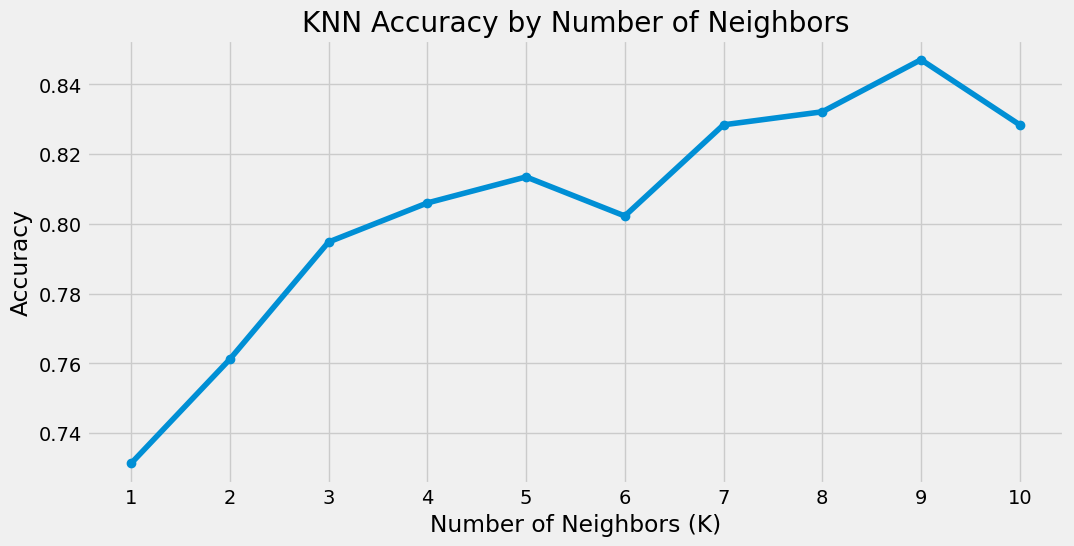

Accuracies for different values of K: [0.7313432835820896, 0.7611940298507462, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8022388059701493, 0.8283582089552238, 0.832089552238806, 0.8470149253731343, 0.8283582089552238]
Maximum accuracy: 0.8470149253731343 at K = 9


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 정확도를 저장할 리스트
accuracies = []

# K 값 1부터 10까지 실험
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)  # KNN 모델 생성
    model.fit(train_X, train_Y)                  # 모델 훈련
    prediction = model.predict(test_X)           # 테스트 데이터 예측
    acc = accuracy_score(test_Y, prediction)     # 정확도 계산
    accuracies.append(acc)                       # 리스트에 저장

# 정확도 변화 시각화
plt.plot(range(1, 11), accuracies, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy by Number of Neighbors')
plt.grid(True)
plt.tight_layout()

# 그래프 크기 조정 및 출력
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

# 결과 출력 - k를 바꾸어 가며 정확도가 높은 그래프를 그려봄 (실제로 머신 러닝을 돌릴 때 사용하면 굉장히 좋은 전략임)
print('Accuracies for different values of K:', accuracies)
print('Maximum accuracy:', max(accuracies), 'at K =', accuracies.index(max(accuracies)) + 1)

# K=1: 예측이 민감하지만, 과적합(overfitting) 위험 있음

# K가 중간값일 때 (예: 3~7): 보통 정확도가 안정적이고 높음

# K가 너무 클 때 (예: 10 이상): 너무 많은 이웃을 참고해서 경계가 흐려짐 → 정확도 하락

In [135]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [137]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


Cross Validation¶
1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [139]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [140]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 1. 분류기 이름과 모델 정의
classifiers = [
    'Linear SVM', 'Radial SVM', 'Logistic Regression',
    'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest'
]

models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# 2. K-Fold 설정: 데이터를 섞고, 랜덤시드 고정
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

# 3. 결과 저장용 리스트
cv_means = []
cv_stds = []

# 4. 각 모델에 대해 교차검증 수행
for model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_means.append(cv_results.mean())
    cv_stds.append(cv_results.std())

# 5. 결과 정리: 평균 정확도 + 표준편차 DataFrame 생성
results_df = pd.DataFrame({
    'Model': classifiers,
    'CV Mean Accuracy': cv_means,
    'CV Std Dev': cv_stds
})

# 6. 보기 좋게 출력
results_df.set_index('Model', inplace=True)
print(results_df)


                     CV Mean Accuracy  CV Std Dev
Model                                            
Linear SVM                   0.784607    0.057841
Radial SVM                   0.828377    0.057096
Logistic Regression          0.799176    0.040154
KNN                          0.808140    0.035630
Decision Tree                0.804732    0.045746
Naive Bayes                  0.795843    0.054861
Random Forest                0.809263    0.043749


✅ 모델별 평균 정확도와 표준편차:

                     CV Mean Accuracy  CV Std Dev
Model                                            
Linear SVM                   0.784607    0.057841
Radial SVM                   0.828377    0.057096
Logistic Regression          0.799176    0.040154
KNN                          0.808140    0.035630
Decision Tree                0.803620    0.044298
Naive Bayes                  0.795843    0.054861
Random Forest                0.811498    0.048418


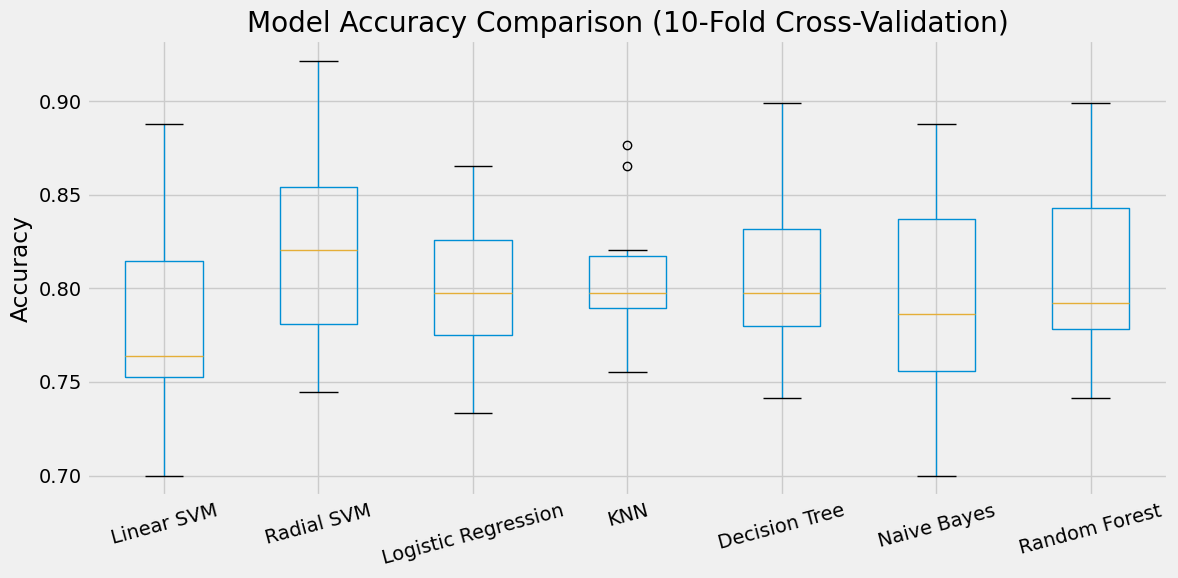

In [144]:
# 1. 모델 이름과 모델 객체 정의
classifiers = [
    'Linear SVM', 'Radial SVM', 'Logistic Regression',
    'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest'
]

models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# 2. K-Fold 설정: 데이터를 무작위로 섞고, 랜덤 시드 고정
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

# 3. 성능 결과 저장 리스트
cv_means = []
cv_stds = []
accuracy = []  # 👈 boxplot용 정확도 배열 저장

# 4. 각 모델에 대해 교차검증
for model in models:
    scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    accuracy.append(scores)             # 10개 정확도 저장 (boxplot용)
    cv_means.append(scores.mean())      # 평균
    cv_stds.append(scores.std())        # 표준편차

# 5. 정확도 평균/표준편차 표 생성
results_df = pd.DataFrame({
    'Model': classifiers,
    'CV Mean Accuracy': cv_means,
    'CV Std Dev': cv_stds
}).set_index('Model')

print("✅ 모델별 평균 정확도와 표준편차:\n")
print(results_df)

# 6. Boxplot 시각화
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=classifiers)  # 모델별 정확도 배열로 구성된 DataFrame
box.T.boxplot()  # transpose해서 x축에 모델, y축에 정확도
plt.title("Model Accuracy Comparison (10-Fold Cross-Validation)")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

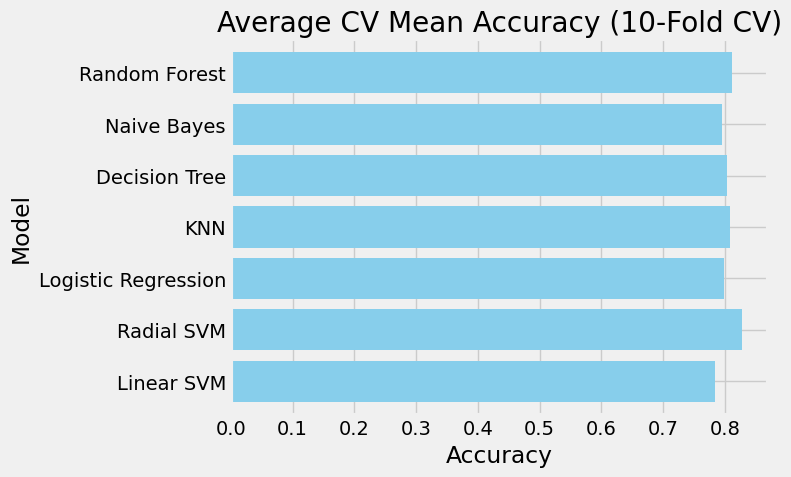

In [147]:
# 정확도 막대그래프 (수평)
results_df['CV Mean Accuracy'].plot.barh(width=0.8, color='skyblue')
plt.title('Average CV Mean Accuracy (10-Fold CV)')
plt.xlabel('Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.tight_layout()
plt.show()


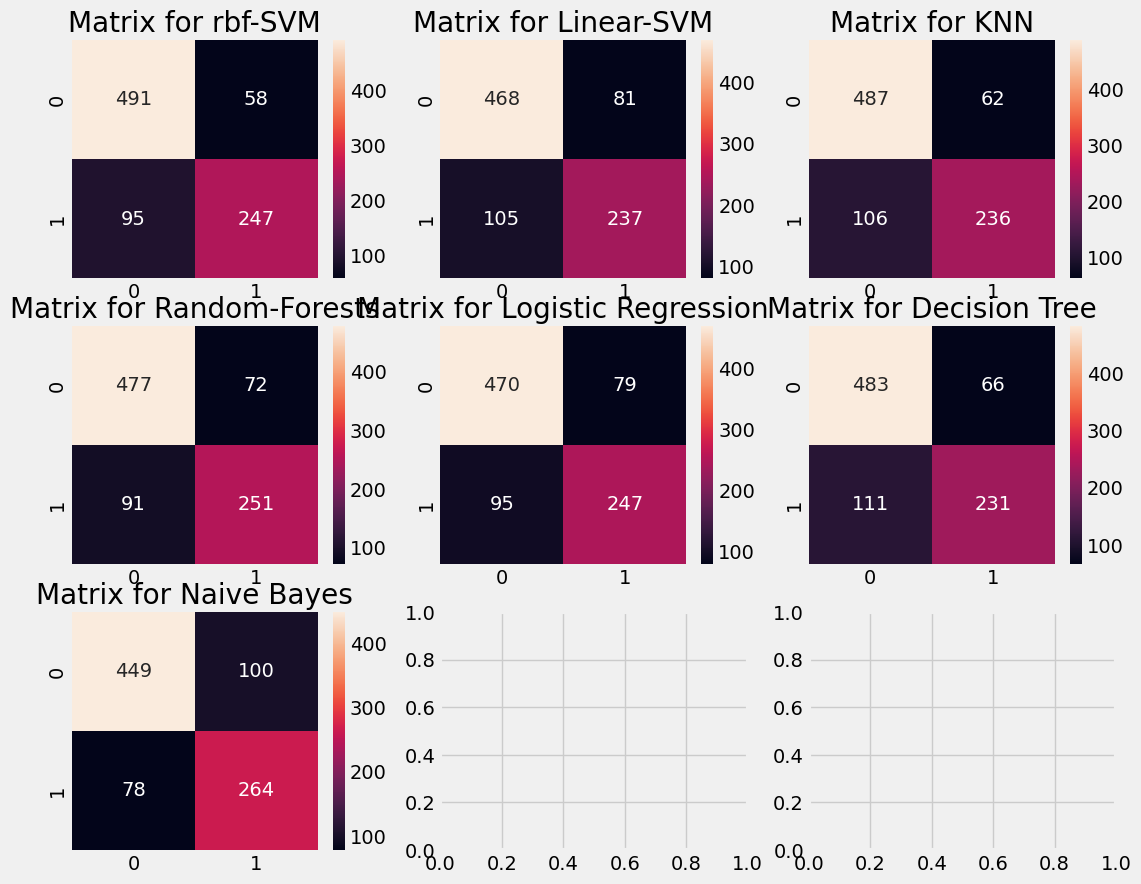

In [148]:
# 1. 3x3 서브플롯 그리드 생성 (총 9개 plot 자리, 실제로는 7개 사용)
f, ax = plt.subplots(3, 3, figsize=(12, 10))

# 2. RBF 커널 SVM 모델에 대한 예측값 생성 및 confusion matrix 시각화
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)  # 10-fold CV 예측
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')  # 혼동 행렬 시각화
ax[0, 0].set_title('Matrix for rbf-SVM')

# 3. 선형 커널 SVM
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

# 4. KNN (K=9)
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

# 5. 랜덤 포레스트
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

# 6. 로지스틱 회귀
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

# 7. 결정 트리
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

# 8. 나이브 베이즈
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

# 9. subplot 간 간격 조정
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# 10. 전체 플롯 표시
plt.show()



✅ 기본 구조: Confusion Matrix란?
예측: 0 (사망)	예측: 1 (생존)
실제: 0	TN (True Negative) = 잘 맞춘 사망자 수	FP (False Positive) = 죽었는데 생존이라고 예측
실제: 1	FN (False Negative) = 살았는데 사망이라고 예측	TP (True Positive) = 잘 맞춘 생존자 수

📌 어떻게 비교하느냐?
모델 여러 개의 confusion matrix를 보고:

TP가 높은 모델 = 생존자 잘 맞춤

FP가 높은 모델 = 죽은 사람을 생존자로 잘못 예측 → 위험

FN이 높은 모델 = 살 사람을 죽은 걸로 봄 → recall 낮음

TN이 높은 모델 = 사망자 예측 잘함 (좋지만 혼자선 부족)

nterpreting Confusion Matrix¶
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

In [150]:
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝 도구인 GridSearchCV 임포트
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1] # 실험할 C(규제 강도) 값 리스트 설정
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # 실험할 gamma(커널의 영향력 범위) 값 리스트 설정
kernel=['rbf','linear'] # 실험할 커널 종류 설정 (선형과 RBF 커널)
hyper={'kernel':kernel,'C':C,'gamma':gamma} # GridSearch에 넣을 하이퍼파라미터 조합 딕셔너리 정의
# SVM 분류기 모델과 하이퍼파라미터 그리드를 설정하여 GridSearchCV 객체 생성
# verbose=True → 진행 중인 정보 출력 (옵션)
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# GridSearchCV를 사용해 전체 X, Y 데이터로 교차검증 수행하며 가장 좋은 조합 찾기
gd.fit(X,Y)
# 가장 좋은 조합의 평균 정확도 출력
print(gd.best_score_)
# 가장 좋은 조합의 SVM 모델(커널 종류, C, gamma) 설정 출력
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [152]:
#이제 머신 러닝 모델들을 모아서 앙상블을 만듬

from sklearn.ensemble import VotingClassifier  # 여러 분류기를 하나로 묶는 앙상블 모델

# 다양한 모델들을 조합한 소프트 보팅 앙상블 모델 정의 및 학습
ensemble_lin_rbf = VotingClassifier(
    estimators=[
        # 개별 모델 이름과 모델 객체 정의 (총 7개)
        ('KNN', KNeighborsClassifier(n_neighbors=10)),                  # K-최근접 이웃
        ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),  # RBF 커널 SVM
        ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)), # 랜덤 포레스트
        ('LR', LogisticRegression(C=0.05)),                               # 로지스틱 회귀
        ('DT', DecisionTreeClassifier(random_state=0)),                  # 결정 트리
        ('NB', GaussianNB()),                                            # 나이브 베이즈
        ('svm', svm.SVC(kernel='linear', probability=True))             # 선형 SVM
    ],
    voting='soft'  # soft voting: 확률값을 평균해서 예측 결정 (더 정교함)
).fit(train_X, train_Y)  # 전체 앙상블 모델을 학습 데이터로 학습


# 테스트 데이터셋에 대해 앙상블 모델의 정확도 평가
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

# 전체 데이터셋(X, Y)에 대해 10-Fold 교차검증을 수행하여 일반화 성능 확인
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())  # 교차검증 평균 정확도 출력


The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8249188514357053


In [153]:
from sklearn.ensemble import BaggingClassifier  # Bagging (배깅) 앙상블 모델 임포트

# BaggingClassifier 생성
# base_estimator: KNN을 사용하며, K=3으로 설정
# n_estimators: 700개의 KNN 모델을 앙상블로 구성
# random_state: 재현 가능성을 위한 시드 설정
model = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=0,
    n_estimators=700
)
# 학습 데이터를 사용해 Bagging된 KNN 모델 학습
model.fit(train_X, train_Y)
# 테스트 데이터에 대한 예측 수행
prediction = model.predict(test_X)
# 정확도 계산 및 출력
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
# 전체 데이터(X, Y)에 대해 10-Fold 교차검증을 수행해 평균 정확도 측정
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

# 개념	설명
# Bagging	여러 개의 모델을 훈련시켜 결과를 평균/투표하여 더 안정된 예측을 생성
# 작동 방식	데이터 샘플을 여러 번 중복 추출(bootstrap) 하여 각 모델에 제공
# 장점	분산을 줄이고 과적합을 막을 수 있음 (특히 결정 트리, KNN 등에서 효과적)

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [154]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [155]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [156]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [157]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [158]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


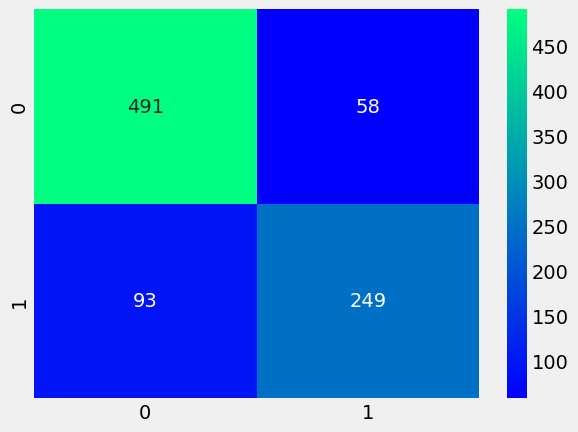

In [160]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)  # AdaBoost 모델 생성 (약한 분류기 200개, 학습률 0.05, 시드 고정)
result = cross_val_predict(ada, X, Y, cv=10)  # 10-Fold 교차검증을 사용해 각 fold별 예측값 생성 (전체 데이터 대상)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')  # 예측값과 실제값으로 혼동 행렬 시각화 (파란색 계열, 정수 표시)
plt.show()  # 시각화된 결과 출력


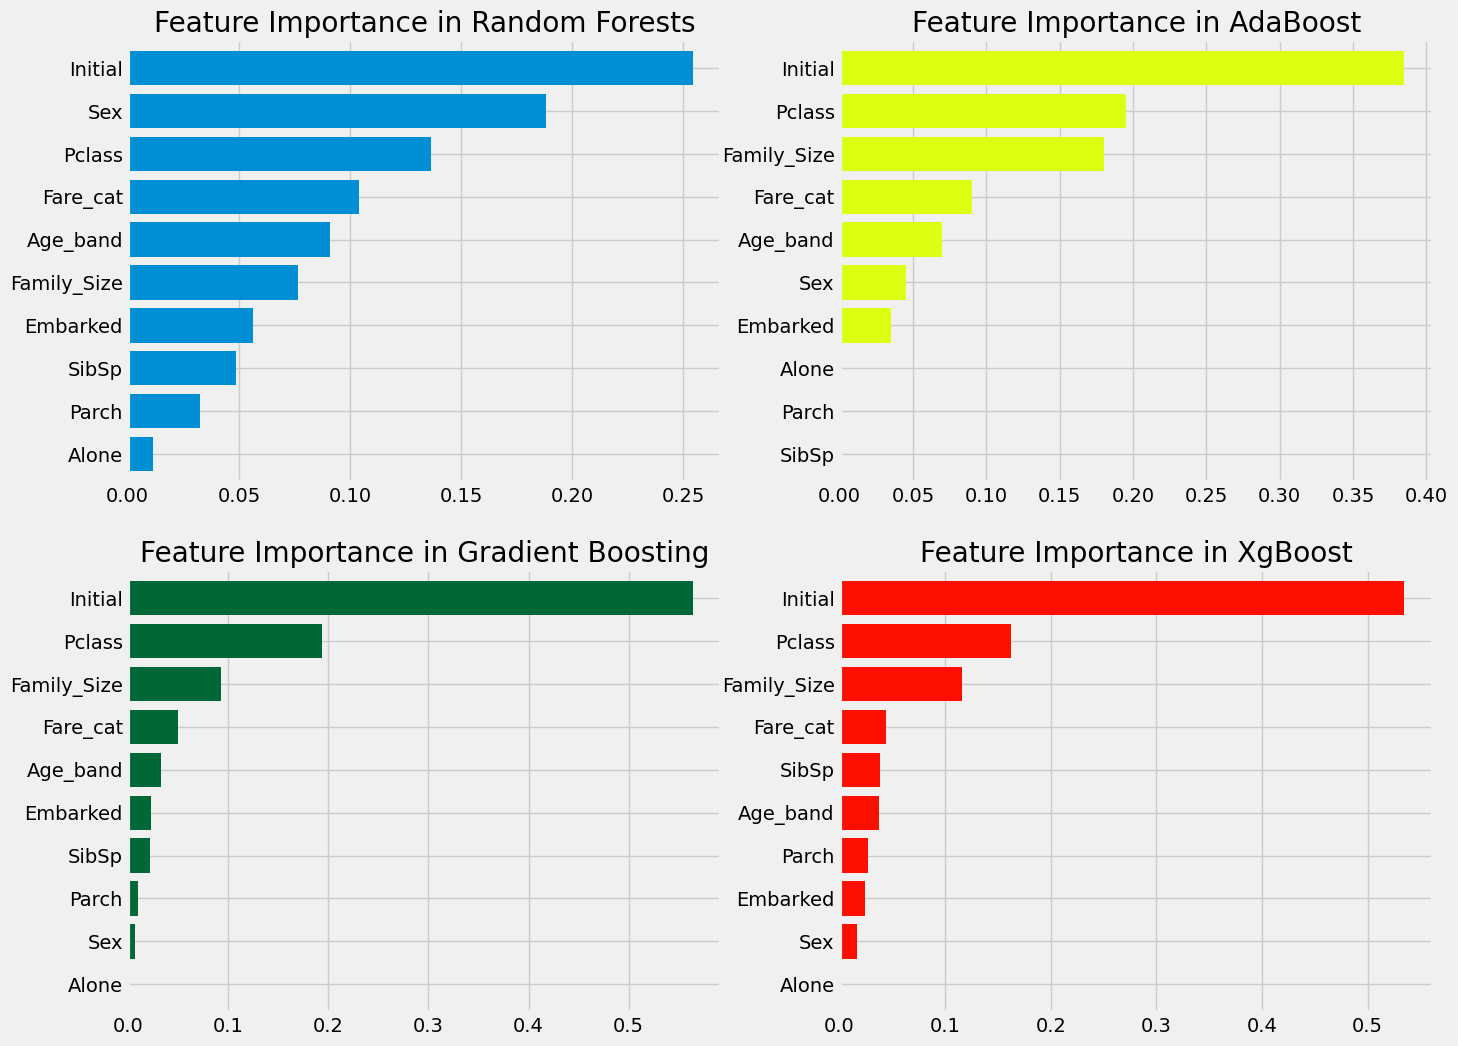

In [161]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))  # 2행 2열 서브플롯 생성 (총 4개), 전체 크기 설정
model = RandomForestClassifier(n_estimators=500, random_state=0)  # 랜덤 포레스트 모델 생성
model.fit(X, Y)  # 전체 데이터(X, Y)로 학습
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])  # 변수 중요도 시각화 (가로 막대그래프)
ax[0, 0].set_title('Feature Importance in Random Forests')  # 타이틀 설정
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)  # AdaBoost 모델 생성
model.fit(X, Y)  # 학습
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')  # 변수 중요도 그래프 (노란색 계열)
ax[0, 1].set_title('Feature Importance in AdaBoost')  # 타이틀 설정
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)  # Gradient Boosting 모델 생성
model.fit(X, Y)  # 학습
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')  # 변수 중요도 시각화 (컬러맵 사용)
ax[1, 0].set_title('Feature Importance in Gradient Boosting')  # 타이틀 설정
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)  # XGBoost 모델 생성 (900개의 약한 학습기)
model.fit(X, Y)  # 학습
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')  # 변수 중요도 시각화 (빨간색 계열)
ax[1, 1].set_title('Feature Importance in XgBoost')  # 타이틀 설정
plt.show()